<a href="https://colab.research.google.com/github/roydpbq/Sarcasm-Oversampling/blob/main/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **載入函式庫與資料**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install smote_variants
!pip install kneed

In [3]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.model_selection import train_test_split

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

import smote_variants as sv
import io 
import json
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle

# Load Classifier library
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, calinski_harabasz_score

In [4]:
!git clone https://github.com/iabufarha/iSarcasmEval

fatal: destination path 'iSarcasmEval' already exists and is not an empty directory.


In [99]:
train = pd.read_csv('/content/iSarcasmEval/train/train.En.csv')
test = pd.read_csv('/content/iSarcasmEval/test/task_A_En_test.csv')

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
# file_name = "data.json"
# io.StringIO[file_name].decode("utf-8")

In [8]:
def pd_df(target):
  target = pd.DataFrame(target)
  return target

In [9]:
import sys
# 印出numpy array 全部
def printAllOn():
  np.set_printoptions(threshold=sys.maxsize)
# 關閉
def printAllOff():
  np.set_printoptions(threshold=False)

def printAll(to_print):
  np.set_printoptions(threshold=sys.maxsize)
  print(to_print)
  np.set_printoptions(threshold=False)

In [12]:
# # ty = np.array(train_y)
# # y = [0] * len(train_y)

# # for idx in range(867):
# #   y[idx] = 1
# # for idx in range(867, 3467):
# #   y[idx] = 0
# y = [7342.1301373073857, 6881.7109460930769, 6531.1657905495022,  
# 6356.2255554679778, 6209.8382535595829, 6094.9052166741121, 
# 5980.0191582610196, 5880.1869867848218, 5779.8957906367368, 
# 5691.1879324562778, 5617.5153566271356, 5532.2613232619951, 
# 5467.352265375117, 5395.4493783888756, 5345.3459908298091, 
# 5290.6769823693812, 5243.5271656371888, 5207.2501206569532, 
# 5164.9617535255456]

# x = range(1, len(y)+1)

# from kneed import KneeLocator
# kn = KneeLocator(x, y, curve='convex', direction='decreasing')
# print(kn.knee)
# 5

# import matplotlib.pyplot as plt
# plt.xlabel('number of clusters k')
# plt.ylabel('Sum of squared distances')
# plt.plot(x, y, 'bx-')
# plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [13]:
# print(len(y), len(x))

# **檢視資料**

In [ ]:
print('--------------------TRAIN--------------------')
train.shape
train.info()
print('\n')
print('--------------------TEST_A--------------------')
test_A.shape
test_A.info()

--------------------TRAIN--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3468 non-null   int64  
 1   tweet                3467 non-null   object 
 2   sarcastic            3468 non-null   int64  
 3   rephrase             867 non-null    object 
 4   sarcasm              867 non-null    float64
 5   irony                867 non-null    float64
 6   satire               867 non-null    float64
 7   understatement       867 non-null    float64
 8   overstatement        867 non-null    float64
 9   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 271.1+ KB


--------------------TEST_A--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Cou

In [ ]:
# 檢查train缺漏值
print('Number of missing values:')
for col in train.columns:
    print('\t%s: %d' % (col,train[col].isna().sum()))

In [ ]:
# 檢查test缺漏值
print('Number of missing values:')
for col in test_A.columns:
    print('\t%s: %d' % (col,test_A[col].isna().sum()))

In [ ]:
#  檢查遺失值資料
train[train['tweet'].isnull()]

In [ ]:
# Drop rows which contain any NaN value in the selected columns
train = train.dropna( how='any',
                    subset=['tweet'])
print(train[train['tweet'].isnull()])

In [ ]:
# 檢查train缺漏值是否順利移除
print('Number of missing values:')
for col in train.columns:
    print('\t%s: %d' % (col,train[col].isna().sum()))

In [ ]:
train.head()

In [ ]:
train.drop(['rephrase', 'sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question'], axis = 1)

In [ ]:
test_A.head()

In [ ]:
#看一下預計要預測的target Y各項的數量多少，類別太過不平均可能會導致label imbalance的問題存在
#進階學習，認識imbalance問題：https://docs.google.com/document/d/1NEQNjLIF-uvNbUt_Vi2Pq3drXVZ3flaLWpqXd72IAaI/edit?usp=sharing
train_label_distribution = train.groupby('sarcastic').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
train_label_distribution.style.background_gradient(cmap='Purples')

In [ ]:
# test_A 
test_A_label_distribution = test_A.groupby('sarcastic').count()['text'].reset_index().sort_values(by='text',ascending=False)
test_A_label_distribution.style.background_gradient(cmap='Purples')

In [ ]:
train.describe() # 數值資料較有用

In [ ]:
# 做一些簡單的，例如說評論的字數
train['Num_words_tweet'] = train['tweet'].apply(lambda x:len(str(x).split())) #Number Of words in tweets
test_A['Num_words_tweet'] = test_A['text'].apply(lambda x:len(str(x).split())) #Number Of words in tweets
# train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
# train['difference_in_words'] = train['Num_word_text'] - train['Num_words_ST'] #Difference in Number of words text and Selected Text

In [ ]:
# 畫出字數這個feature的分佈情形
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['Num_words_tweet'], shade=True, color="r").set_title('Distribution of Number Of words')
p1=sns.kdeplot(test_A['Num_words_tweet'], shade=True, color="b")

In [ ]:
#先清理資料
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower() 
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
train['tf'] = train['tweet'].apply(clean_text)
# train['processed_tweet'] = train['tweet'].apply(lambda x:clean_text(x))

In [ ]:
#統計詞頻
#def print_term_frequency():
train['tf'] = train['tf'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['tf'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [ ]:
#統計詞頻
#def print_term_frequency():
train['tf'] = train['tf'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['tf'] for item in sublist])
temp = pd.DataFrame(top.most_common(100))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [ ]:
#通常 nltk套件中會有stopword的函式，可以將它import出來自己挑要去掉的stopword，因為在本任務中，
#去掉Ｉ、to這種字或許是有意義的，但stopword中的great等去掉可能就會帶來不好的效果，這邊為求方便，會全部先去
nltk.download('stopwords')
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [ ]:
train['tf'] = train['tf'].apply(lambda x:remove_stopword(x))

In [ ]:
 stopwords.words('english')

In [ ]:
#去掉後再畫一次
top = Counter([item for sublist in train['tf'] for item in sublist])
temp = pd.DataFrame(top.most_common(50))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

# SARC

In [ ]:
# import bz2 and decompress
import sys
import os
import bz2
from bz2 import decompress
import json

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
file_name # = sarc_comment
uploaded[file_name].decode("utf-8")
uploaded[file_name].decode("utf-8").split("\r\n")

NameError: ignored

In [ ]:
with open('/content/drive/MyDrive/論文/實驗/comments.json') as f:
   data = json.load(f)

# print(data)

In [ ]:
# filepath = 'https://nlp.cs.princeton.edu/SARC/2.0/raw/sequences.csv.bz2'
# SARC_sequence = pd.read_csv(url)
!wget https://nlp.cs.princeton.edu/SARC/2.0/raw/comments.json.bz2

--2022-07-21 14:29:19--  https://nlp.cs.princeton.edu/SARC/2.0/raw/comments.json.bz2
Resolving nlp.cs.princeton.edu (nlp.cs.princeton.edu)... 128.112.136.61
Connecting to nlp.cs.princeton.edu (nlp.cs.princeton.edu)|128.112.136.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1330919143 (1.2G) [application/x-bzip2]
Saving to: ‘comments.json.bz2’

comments.json.bz2   100%[===================>]   1.24G  63.1MB/s    in 21s     

2022-07-21 14:29:40 (60.0 MB/s) - ‘comments.json.bz2’ saved [1330919143/1330919143]



In [ ]:
zipfile = bz2.BZ2File('/content/comments.json.bz2') # open the file
data = zipfile.read() # get the decompressed data
newfilepath = filepath[:-4] # assuming the filepath ends with .bz2
open(newfilepath, 'wb').write(data) # write a uncompressed file

In [ ]:
filepath = '/content/comments.json.bz2'
newfilepath = filepath[:-4] # assuming the filepath ends with .bz2
open(newfilepath, 'wb').write(data) # write a uncompressed file

In [ ]:
with bz2.BZ2File('comments.json.bz2', 'r') as f:
  file_content = f.read()

FileNotFoundError: ignored

In [ ]:
# Function to seperate labels and text
def get_labels_and_texts(file):
    
    text_data = []
    for line in bz2.BZ2File(file):
        x = line.decode("utf-8")
        text_data.append([x[10:].strip(),int(x[9]) - 1])
    return text_data

In [ ]:
# SARC_comment = get_labels_and_texts(file_content)
# url = '/content/comments.json.bz2'
# # using bz2.decompress(s) method
# SARC_comment = bz2.decompress(url)


In [ ]:
# SARC_comment.head()

# **資料清理 - SemEval-2022**

In [31]:
train_df = pd.read_csv('/content/iSarcasmEval/train/train.En.csv')
test_df = pd.read_csv('/content/iSarcasmEval/test/task_A_En_test.csv')

In [32]:
test_df.rename(columns = {'text':'tweet'}, inplace = True)
display(test_df.loc[10])

tweet        This does not surprise me! Kat is a PR queen 👑...
sarcastic                                                    0
Name: 10, dtype: object

In [33]:
# 只保留 tweet, sarcastic 欄位

# train_df = train_df.drop(['rephrase', 'sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question'], axis = 1)
train_df = train_df[['tweet', 'sarcastic']]

In [34]:
# Drop rows which contain any NaN value in the selected columns
train_df = train_df.dropna( how='any',
                    subset=['tweet'])

# 檢查是否正確刪除空值資料
print(train_df[train_df['tweet'].isnull()])
print(test_df[test_df['tweet'].isnull()])

Empty DataFrame
Columns: [tweet, sarcastic]
Index: []
Empty DataFrame
Columns: [tweet, sarcastic]
Index: []


In [35]:
# 重設index
train_df = train_df.reset_index()
train_df = train_df.drop(columns=["index"])

In [19]:
# pip install clean-text

In [20]:
# from cleantext import clean
# clean(text, no_emoji=True)

In [21]:
# import emoji
# import re

# def remove_emoji(string):
#   text = emoji.demojize(string)
#   return text

In [19]:
# 清除特殊符號函式
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [173]:
# def print_full(x):
#     pd.set_option('display.max_columns', len(x))
#     print(x)
#     pd.reset_option('display.max_columns')

In [36]:
(train_df.head(20))

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1
5,"@jimrossignol I choose to interpret it as ""XD""...",1
6,Why would Alexa's recipe for Yorkshire pudding...,1
7,someone hit me w a horse tranquilizer istg ive...,1
8,Loving season 4 of trump does America. Funnies...,1
9,Holly Arnold ??? Who #ImACeleb #MBE nope not ...,1


In [178]:
train_X

,tweet
0,thing got college caffeine addiction
1,love professors draw big question mark next an...
2,remember hundred emails companies covid starte...
3,today poppop told “forced” go college okay sur...
4,volphancarol littlewhitty mysticalmanatee also...
...,...
3462,population spike chicago months ridiculous
3463,youd think second last english class year prof...
3464,i’m finally surfacing holiday scotland difficu...
3465,couldnt prouder today well done every student ...


In [22]:
test_df.loc[10, 'tweet']

'This does not surprise me! Kat is a PR queen 👑💕🌟👏🏻'

In [23]:
# 清除特殊符號
def remove_special_character(my_data):
  i = 0
  for text in my_data['tweet']:
    # text = text.replce(text, remove_emoji(text))
    my_data.loc[i, 'tweet'] = remove_emoji(text)
    i = i+1

remove_special_character(train_df)
remove_special_character(test_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
test_df.loc[10, 'tweet']

'This does not surprise me! Kat is a PR queen '

In [25]:
# 清理其他不需要資料
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower() 
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [26]:
#簡單前處理
# 清除stopword
nltk.download('stopwords')
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

#去除標點
train_df['tweet'] = train_df['tweet'].apply(lambda x:clean_text(x))
test_df['tweet'] = test_df['tweet'].apply(lambda x:clean_text(x))

#去除stopword
train_df['tweet'] =train_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))
test_df['tweet'] = test_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [27]:
test_df.loc[10, 'tweet']

'surprise kat pr queen'

In [28]:
# Stemming
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
train_df['tweet'] = train_df['tweet'].apply(lambda x: ''.join([stemmer.stem(i) for i in x])) # stemming
test_df['tweet']  = test_df['tweet'] .apply(lambda x: ''.join([stemmer.stem(i) for i in x])) # stemming

In [29]:
test_df.loc[0, 'tweet']

'size toulouse team pack monstrous cant see welsh region ever winning money talks say'

In [30]:
# X = train_df.drop(columns = ['sarcastic'])
# y = train_df['sarcastic']
train_X = train_df.drop(columns = ['sarcastic'])
train_y = train_df['sarcastic']

test_X = test_df.drop(columns = ['sarcastic'])
test_y = test_df['sarcastic']

In [162]:
print(train_X)
print(test_X)

                                                  tweet
0                  thing got college caffeine addiction
1     love professors draw big question mark next an...
2     remember hundred emails companies covid starte...
3     today poppop told “forced” go college okay sur...
4     volphancarol littlewhitty mysticalmanatee also...
...                                                 ...
3462         population spike chicago months ridiculous
3463  youd think second last english class year prof...
3464  i’m finally surfacing holiday scotland difficu...
3465  couldnt prouder today well done every student ...
3466  overheard year old games friend smell like tar...

[3467 rows x 1 columns]
                                                  tweet
0     size toulouse team pack monstrous cant see wel...
1                                               pinball
2     scottish government want people get booster sh...
3     villainous pro tip change device name bluetoot...
4                      

In [33]:
print(train_y)
print(test_y)

0       1
1       1
2       1
3       1
4       1
       ..
3462    0
3463    0
3464    0
3465    0
3466    0
Name: sarcastic, Length: 3467, dtype: int64
0       0
1       0
2       1
3       0
4       0
       ..
1395    0
1396    0
1397    0
1398    1
1399    1
Name: sarcastic, Length: 1400, dtype: int64


In [34]:
# train_X, test_X, train_y, test_y = train_test_split(X, y, 
#                                                     train_size=0.8,
#                                                     test_size=0.2,
#                                                     random_state=999,
#                                                     stratify=y)

In [35]:
print(train_y.value_counts())
print(test_y.value_counts())

0    2600
1     867
Name: sarcastic, dtype: int64
0    1200
1     200
Name: sarcastic, dtype: int64


In [36]:
#切完資料id會跑掉，這邊記得重新配ID，不然後面建模容易出事
# train_X = train_X.reset_index()
# test_X = test_X.reset_index()
# train_y = train_y.reset_index()
# test_y = test_y.reset_index()

# train_X = train_X.drop(columns=["index"])
# test_X = test_X.drop(columns=["index"])
# train_y = train_y.drop(columns=["index"])
# test_y = test_y.drop(columns=["index"])

# TF-IDF

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
train_tfidf = tfidf_vectorizer.fit(train_df['tweet'])

In [94]:
#tfidf的向量是我們的屬性
train_tfidf_result=train_tfidf.fit_transform(train_df['tweet'])
train_tfidf_result.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
train_tfidf_result.todense()[0]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [96]:
feature_names = tfidf_vectorizer.get_feature_names()
corpus_index = [n for n in train_df['tweet']]

tf_idf_df = pd.DataFrame(train_tfidf_result.todense(), index=corpus_index, columns=feature_names)

In [97]:
tf_idf_df

,000,10,100,11,12,13,15,18,1st,20,...,year,years,yes,yesterday,yo,young,younger,youtube,zero,zoom
The only thing I got from college is a caffeine addiction,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said black lives matter... we love capitalism 🥰🙌🏼,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The population spike in Chicago in 9 months is about to be ridiculous,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You'd think in the second to last English class of the year my prof would stop calling me Sean,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.342766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I’m finally surfacing after a holiday to Scotland and a difficult few days with an ill child (hopefully on the mend now). Happy September all! Smell the pencil shavings and that new notebook aroma. 1st Sept has always seemed a lot more promising than 1st January,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.549847,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Couldn't be prouder today. Well done to every student who got their GCSEs this morning after 18 months that would challenge anyone in history, at any stage in their lives. The teachers did an amazing job. #GCSEresults2021 #GCSEresults",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.318616,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create Embeddings

In [37]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec

# 決定 Embeddings 維度大小
vector_size = [32, 64, 128, 256, 512, 1024]

# Embeddings
embed_d2v = [0] * len(vector_size)
embed_w2v = [0] * len(vector_size)
embed_TFIDF = [0] * len(vector_size)
embed_GLOVE = [0] * len(vector_size)
embed_FastText = [0] * len(vector_size)
embed_Bert = [0] * len(vector_size)

# Test embeddings
test_embed_d2v = [0] * len(vector_size)
test_embed_w2v = [0] * len(vector_size)
test_embed_TFIDF = [0] * len(vector_size)
test_embed_GLOVE = [0] * len(vector_size)
test_embed_FastText = [0] * len(vector_size)
test_embed_Bert = [0] * len(vector_size)

train_tag_docs= [TaggedDocument(doc.split(' '), [i]) for i, doc in enumerate(train_X.tweet)]
test_tag_docs = [TaggedDocument(doc.split(' '), [i]) for i, doc in enumerate(test_X.tweet)]

In [38]:
# Doc2Vec
def create_d2v(model, tag_docs, my_data, vector_size):
  model = Doc2Vec(vector_size=vector_size, min_count=5, workers=8, epochs=40)
  model.build_vocab(tag_docs)
  model.train(tag_docs, total_examples = model.corpus_count, epochs = model.epochs)

  doc2vec = [model.infer_vector((my_data['tweet'][i].split(' '))) for i in range(0, len(my_data['tweet']))]
  doc2vec = np.array(doc2vec).tolist()
  doc2vec = pd.DataFrame(doc2vec)

  return doc2vec

# Word2Vec
def create_w2v(model, my_data, vector_size):
  model = Word2Vec(size=vector_size, window=5, min_count=1, workers=4)
  model.build_vocab(my_data.tweet)
  model.train(my_data.tweet, total_examples=model.corpus_count, epochs=30, report_delay=1)

  return word2vec
### Interfaces
# def creat_TFIDF(model, vector_size):
# def create_GLOVE(model, vector_size):
# def create_FastText(model, vector_size):
# def create_Bert(model, vector_size):

In [39]:
### 
# def create_embedding(model, vector_size):
#   create_d2c(model, vector_size)
#   create_w2v(model, vector_size)
#   creat_TFIDF(model, vector_size)
#   create_GLOVE(model, vector_size)
#   create_FastText(model, vector_size)
#   create_Bert(model, vector_size)

In [40]:
# Training
# for idx in range(len(vector_size)):
#   embed_d2v[idx] = create_d2v(embed_d2v[idx], train_tag_docs, train_X, vector_size[idx])

# Testing 
for idx in range(len(vector_size)):
  test_embed_d2v[idx] = create_d2v(test_embed_d2v[idx], test_tag_docs, test_X, vector_size[idx])

In [ ]:
test_embed_d2v[2]

In [42]:
def save_csv_embedding(file, folder_path, embedding_size):
  # if super_path in folder_path:
  #   folder_path.replace(super_path, '')

  #   SemEval_Doc2Vec_embedding_path = 'SemEval_2022_iSarcasm/Doc2Vec'
  #   if SemEval_Doc2Vec_embedding_path in folder_path:
  #     folder_path.replace(SemEval_Doc2Vec_embedding_path, '')
  #     if 'iSarcasm_Doc2Vec_' in folder_path:
  #       path = '/content/drive/MyDrive/論文/實驗/'+'SemEval_2022_iSarcasm/Doc2Vec/' + 'iSarcasm_Doc2Vec_' + str(embedding_size) + '.csv'

  # for idx in range(len(vector_size)):
  path = '/content/drive/MyDrive/論文/實驗/SemEval_2022_iSarcasm/Doc2Vec/iSarcasm_Doc2Vec_'+str(embedding_size)+'.csv'

  with open(path, 'w', encoding = 'utf-8-sig') as f:
    pd_df(file).to_csv(f)

In [43]:
# save_csv_embedding(test_embed_d2v)

In [44]:
super_path = '/content/drive/MyDrive/論文/實驗'
folder_path = '/content/drive/MyDrive/論文/實驗/SemEval_2022_iSarcasm/Doc2Vec'
print(folder_path.replace('/content/drive/MyDrive/論文/實驗', ''))

/SemEval_2022_iSarcasm/Doc2Vec


In [45]:
def load_csv_embedding(folder_path, embedding_size):
  if super_path in folder_path:
    folder_path.replace(super_path, '')

    SemEval_Doc2Vec_embedding_path = 'SemEval_2022_iSarcasm/Doc2Vec'
    if SemEval_Doc2Vec_embedding_path in folder_path:
      folder_path.replace(SemEval_Doc2Vec_embedding_path, '')
      if 'iSarcasm_Doc2Vec_' in folder_path:
        path = '/content/drive/MyDrive/論文/實驗/'+'SemEval_2022_iSarcasm/Doc2Vec/' + 'iSarcasm_Doc2Vec_' + str(embedding_size) + '.csv'

  # globals()['iSarcasm_Doc2Vec_%s' % str(embedding_size)] = pd.read_csv(path)
  csv = pd.read_csv(path)

  return csv

In [46]:
# Load embeddings
for idx in range(len(embed_d2v)):
  file_path = '/content/drive/MyDrive/論文/實驗/'+'SemEval_2022_iSarcasm/Doc2Vec/' +'iSarcasm_Doc2Vec_'
  embed_d2v[idx] = load_csv_embedding(file_path, vector_size[idx])
  embed_d2v[idx] = embed_d2v[idx].drop(columns=['Unnamed: 0'])

In [47]:
embed_d2v[2]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.020384,0.003199,0.008520,-0.099952,-0.003551,-0.020410,-0.002884,-0.029922,-0.026921,-0.079968,...,-0.025502,-0.006704,-0.066751,0.012399,-0.051290,0.058441,-0.002016,0.036864,-0.036947,-0.008153
1,-0.062318,-0.013981,0.030550,-0.050105,0.018465,0.000472,-0.007611,0.014618,-0.041153,-0.039147,...,0.043636,0.064560,-0.047787,-0.002400,0.006386,0.059694,0.032293,-0.028430,-0.035175,-0.012114
2,-0.031634,-0.007381,0.001836,-0.160523,0.039571,-0.051888,-0.001032,-0.013867,-0.023529,-0.103981,...,-0.043504,-0.009672,-0.116069,0.006063,-0.035605,0.047949,-0.000153,0.045578,-0.082449,0.035731
3,-0.043362,-0.020034,0.033114,-0.088057,0.006820,-0.022716,-0.002936,-0.023747,-0.022025,-0.069732,...,0.016521,0.006011,-0.044675,0.007318,-0.040139,0.081588,-0.034748,-0.015560,0.006797,-0.006535
4,-0.053044,-0.044101,0.051515,-0.124670,0.014477,-0.027937,0.012765,-0.050819,-0.064146,-0.122291,...,0.013720,0.037081,-0.105883,0.019115,-0.030051,0.074074,-0.035294,-0.057196,-0.024530,0.016698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,-0.072611,-0.032532,0.035881,-0.167914,0.021248,-0.036587,0.000186,-0.073930,-0.066013,-0.123601,...,0.001509,-0.002192,-0.124369,0.003881,-0.065485,0.102231,-0.041254,-0.023948,-0.047312,-0.012077
3463,-0.022013,0.034479,-0.048282,-0.041423,0.039264,-0.030466,0.015327,-0.063538,0.030720,0.022404,...,-0.075174,-0.099914,-0.049020,0.009571,-0.064933,0.065685,-0.077137,0.071088,-0.040117,-0.010193
3464,-0.029349,0.027471,0.031706,-0.024598,0.048845,-0.004244,0.022163,-0.141168,-0.010025,0.072848,...,-0.035856,-0.099680,-0.060794,0.018156,-0.088658,0.061372,-0.064439,-0.005084,-0.064059,-0.082297
3465,0.017065,0.098303,-0.050628,-0.124234,0.034517,-0.064264,-0.056005,-0.073738,0.048276,0.002431,...,-0.081527,-0.117408,-0.071694,-0.016092,-0.106316,0.074141,-0.015254,0.124216,-0.077117,0.002607


In [48]:
# np_embed_d2v = embed_d2v[0].to_numpy()
# print(len(np_embed_d2v))

# Saving NumPy array as a csv file
# numpy_to_csv = np.loadtxt(fname="rain-fall.csv", delimiter=",")
# np.savetxt(fname="saved-np_embed_d2v.csv", delimiter=",", X=np_embed_d2v)

In [49]:
# os.path.getsize('/content/saved-np_embed_d2v.csv')

In [50]:
# numpy.savetxt(".csv", a, delimiter=",")

In [51]:
# for n in range(0, 7):
#     globals()['strg%s' % n] = 'Hello'

In [52]:
# for x in range(0, 7):
#     globals()[f"variable1{x}"] = f"Hello the variable number {x}!"

# print(variable15)

In [53]:
# doc2vec = [0] * len(vector_size)

# for idx in range(len(vector_size)):
#   doc2vec[idx] = [model_d2v[idx].infer_vector((train_df['tweet'][i].split(' '))) for i in range(0, len(train_df['tweet']))]
#   # print(type(train_doc2vec), np.shape(train_doc2vec))
#   # print(train_doc2vec[0])

#   doc2vec[idx] = np.array(doc2vec[idx]).tolist()
#   # print(type(train_doc2vec), np.shape(train_doc2vec))
#   # print(train_doc2vec[0])

# for idx in range(len(vector_size)):
#  doc2vec[idx] = pd.DataFrame(doc2vec[idx])

In [54]:
# train_doc2vec = [model_d2v.infer_vector((train_df['tweet'][i].split(' '))) for i in range(0, len(train_df['tweet']))]
# train_doc2vec = np.array(train_doc2vec).tolist()

# train_doc2vec = pd.DataFrame(train_doc2vec)

In [55]:
#存一下模型不然重跑會哭出來/content/drive/MyDrive
# model.save("/content/drive/MyDrive/論文/實驗/SemEval_2022_iSarcasm/Code/iSarcasm_doc2vec128.model")

# Word2Vec

In [156]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

In [147]:
def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

In [154]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [155]:
# Python program to generate word vectors using Word2Vec
 
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec
 
#  Reads ‘alice.txt’ file
# sample = open("C:\\Users\\Admin\\Desktop\\alice.txt", "utf8")
s = train_X
 
# Replaces escape character with space
f = s.replace("\n", " ")
 
data = []
 
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
     
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
 
    data.append(temp)
 
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1,
                              vector_size = 100, window = 5)
 
# Print results
print("Cosine similarity between 'alice' " +
               "and 'wonderland' - CBOW : ",
    model1.wv.similarity('alice', 'wonderland'))
     
print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ",
      model1.wv.similarity('alice', 'machines'))
 
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
                                             window = 5, sg = 1)
 
# Print results
print("Cosine similarity between 'alice' " +
          "and 'wonderland' - Skip Gram : ",
    model2.wv.similarity('alice', 'wonderland'))
     
print("Cosine similarity between 'alice' " +
            "and 'machines' - Skip Gram : ",
      model2.wv.similarity('alice', 'machines'))

TypeError: ignored

In [127]:
train_corpus = train_x
print(train_corpus.head())

0                 thing got college caffeine addiction
1    love professors draw big question mark next an...
2    remember hundred emails companies covid starte...
3    today poppop told “forced” go college okay sur...
4    volphancarol littlewhitty mysticalmanatee also...
Name: tweet, dtype: object


In [152]:
model_200 = Word2Vec(train_tag_docs, size=200, iter=10)

TypeError: ignored

In [151]:
# model.most_similar()
most_similar(model_200, ['college'])

college not found in Word2Vec model!


""


In [120]:
import gensim.downloader
# Show all available models in gensim-data
# print(list(gensim.downloader.info()['models'].keys()))
# ['fasttext-wiki-news-subwords-300',
#  'conceptnet-numberbatch-17-06-300',
#  'word2vec-ruscorpora-300',
#  'word2vec-google-news-300',
#  'glove-wiki-gigaword-50',
#  'glove-wiki-gigaword-100',
#  'glove-wiki-gigaword-200',
#  'glove-wiki-gigaword-300',
#  'glove-twitter-25',
#  'glove-twitter-50',
#  'glove-twitter-100',
#  'glove-twitter-200',
#  '__testing_word2vec-matrix-synopsis']

# # Download the "glove-twitter-25" embeddings
# glove_vectors = gensim.downloader.load('glove-twitter-25')

# Use the downloaded vectors as usual:
glove_vectors.most_similar('irony')
# [('facebook', 0.948005199432373),
#  ('tweet', 0.9403423070907593),
#  ('fb', 0.9342358708381653),
#  ('instagram', 0.9104824066162109),
#  ('chat', 0.8964964747428894),
#  ('hashtag', 0.8885937333106995),
#  ('tweets', 0.8878158330917358),
#  ('tl', 0.8778461217880249),
#  ('link', 0.8778210878372192),
#  ('internet', 0.8753897547721863)]

[('ironic', 0.8911806344985962),
 ('sickening', 0.8787575960159302),
 ('unfortunate', 0.8718001246452332),
 ('disturbing', 0.8708876371383667),
 ('stupidity', 0.8695792555809021),
 ('scares', 0.8694627285003662),
 ('coincidence', 0.8670020699501038),
 ('sarcasm', 0.8638031482696533),
 ('tragic', 0.8626933097839355),
 ('metaphor', 0.858344316482544)]

In [ ]:
for token in tokens[i] if token not in nltk_stopwords:


In [ ]:
segmention_data = []
for i in range(10000):
    segmention_data.append([token.lower() for token in train_df.tweet[i] if token not in nltk_stopwords])

# Oversampling - setting

In [56]:
# Oversampling 
import smote_variants as sv

# Prepare oversampler (Poly, Prow, IPF)
# 參數皆為預設
oversampler_poly = sv.polynom_fit_SMOTE(proportion = 1.0, topology = 'star', random_state = None)
oversampler_prow = sv.ProWSyn(proportion=1.0, n_neighbors=5, L=5, theta=1.0, n_jobs=1, random_state=None)
oversampler_ipf = sv.SMOTE_IPF(proportion=1.0, n_neighbors=5, n_folds=9, k=3, p=0.01, voting='majority', classifier=DecisionTreeClassifier(random_state=2), n_jobs=1, random_state=None)

In [57]:
# 生成資料
def oversample(data, label):
  poly_x_samp, poly_y_samp = oversampler_poly.sample(np.array(data), label)
  prow_x_samp, prow_y_samp = oversampler_prow.sample(np.array(data), label)
  ipf_x_samp, ipf_y_samp = oversampler_ipf.sample(np.array(data), label)
  
  x_samp = []
  x_samp.append(poly_x_samp)
  x_samp.append(prow_x_samp)
  x_samp.append(ipf_x_samp)

  y_samp = []
  y_samp.append(poly_y_samp)
  y_samp.append(prow_y_samp)
  y_samp.append(ipf_y_samp)

  return x_samp, y_samp

In [58]:
def CD_preprocess(x_samp, y_samp, keep_data):
  # 生成資料轉換成DataFrame
  df_x = []
  df_y = []
  for obj in x_samp:
    df_x.append(pd_df(obj))
  for obj in y_samp:
    df_y.append(pd_df(obj))

  # 把欄位'0'改成'y'
  for idx in range(len(df_y)):
    df_y[idx] = df_y[idx].rename(columns={0:'y'})

  # 合併data, label
  df = []
  for idx in range(len(df_x)):
    temp = pd.concat([df_x[idx], df_y[idx]], axis=1)
    df.append(temp)

  # 只留新生成資料
  for idx in range(len(df)):
    df[idx] = df[idx][keep_data:]
  
  return df

In [59]:
# data, label分開
def get_data_label(df):
  df_data = []
  df_label = []
  
  for element in df:
    df_data.append(element.drop('y', axis = 1).values)
  for element in df:
    df_label.append(element['y'])

  return df_data, df_label

# 資料切割 

In [60]:
# 取得data, label放入 training set
train_x = [0] * len(embed_d2v)

# Get Embeddings
for idx in range(len(embed_d2v)):
  train_x[idx] = embed_d2v[idx]

# Get Labels
train_y = pd.DataFrame(train_df['sarcastic'])

In [61]:
# 決定資料切分方式
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

kf = KFold(n_splits=5)
kf_split = kf.split(train_x[2])

ss = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 777)
ss_split = ss.split(train_x[2])

sf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 777)
sf_split = sf.split(train_x[2], train_y)

sss = StratifiedShuffleSplit(n_splits = 5, test_size=0.2, random_state = 777)
sss_split = sss.split(train_x[2], train_y)

In [62]:
split_set = [kf, ss, sf, sss]

In [63]:
# 檢視split結果
def show_split(split):
  for i, j in split:
    print(i, j)

def split_length(split):
  for i, j in split:
    print(len(i), len(j))

print('KFold split :')
show_split(kf_split)

print('\nShuffleSplit split :')
show_split(ss_split)

print('\nStratifiedKFold split :')
show_split(sf_split)

print('\nStratifiedShuffleSplit split :')
show_split(sss_split)

KFold split :
[ 694  695  696 ... 3464 3465 3466] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 

In [64]:
# Oversamle 5 fold data (OD) with 3 techniques (= 15 set of data)
y = np.array(train_df['sarcastic'])

# Container for 5 fold training, testing data
X_train_list = []
X_validation_list = []
y_train_list = []
y_validation_list = []

# Container for data in 5 fold generated from 3 algorithms (df[5][3])
df = []

In [65]:
# Split and shffle data
# def Shuffle_split_data(X, my_split):
#   X = np.array(X)
#   # Iterate through 5 fold training data
#   for train_indices, validation_indices in my_split:

#     X_train, X_validation, y_train, y_validation = X[train_indices, :], X[validation_indices, :], y[train_indices], y[validation_indices]

#     # # 儲存 5 fold training, testing data
#     X_train = shuffle(X_train, random_state = 777)
#     y_train = shuffle(y_train, random_state = 777)
#     X_validation = shuffle(X_validation, random_state = 777)
#     y_validation = shuffle(y_validation, random_state = 777)
    
#     X_train_list.append(X_train)
#     X_validation_list.append(X_validation)
#     y_train_list.append(y_train)
#     y_validation_list.append(y_validation)

# Shuffle_split_data(embed_d2v[2], sf.split(X, y))

In [66]:
# X_train_list[0]

In [67]:
# Split data
def split_data(X, my_split):
  X = np.array(X)
  # Iterate through 5 fold training data
  for train_indices, validation_indices in my_split:

    X_train, X_validation, y_train, y_validation = X[train_indices, :], X[validation_indices, :], y[train_indices], y[validation_indices]

    # 儲存 5 fold training, testing data
    X_train_list.append(X_train)
    X_validation_list.append(X_validation)
    y_train_list.append(y_train)
    y_validation_list.append(y_validation)

In [68]:
split_data(embed_d2v[2], sf.split(train_X, train_y))

In [69]:
X_train_list[0]

array([[-0.02038442,  0.00319853,  0.00852033, ...,  0.03686418,
        -0.03694666, -0.00815279],
       [-0.06231799, -0.01398123,  0.03055034, ..., -0.02843044,
        -0.03517532, -0.0121139 ],
       [-0.03163411, -0.00738053,  0.0018356 , ...,  0.04557782,
        -0.08244948,  0.03573071],
       ...,
       [-0.02201308,  0.03447893, -0.04828225, ...,  0.07108844,
        -0.04011726, -0.01019284],
       [ 0.01706538,  0.09830313, -0.05062811, ...,  0.12421555,
        -0.07711736,  0.00260739],
       [-0.01654996,  0.0338443 , -0.00809575, ...,  0.03075441,
        -0.03190957, -0.0201376 ]])

In [70]:
def create_oversampling_data(X, my_split):
  Oversampling_data = []
  X = np.array(X)
  # Iterate through 5 fold training data
  for train_indices, validation_indices in my_split:

    X_train, X_validation, y_train, y_validation = X[train_indices, :], X[validation_indices, :], y[train_indices], y[validation_indices]
    # Oversampling with 3 technique
    x_samp, y_samp = oversample(X_train, y_train)
    # Keep the Oversampling data
    Oversampling_data.append(CD_preprocess(x_samp, y_samp, len(X_train)))
  
  return Oversampling_data

In [71]:
# df = create_oversampling_data(embed_d2v[2], sf.split(X, y))

# 集成比例排列組合

In [72]:
# Ensemble Ratio
EO2 = [[0.5, 0.5, 0.0], [ 0.2, 0.8, 0.0], [ 0.3, 0.7, 0.0]] # list # 3+6+6 = 15種組合
EO3 = [[0.4, 0.4, 0.2], [ 0.3, 0.3, 0.4], [ 0.2, 0.5, 0.3]] # list # 3+3+6 = 12種組合

# Get all permutations of EO2 or EO3
from itertools import permutations

def permute(ratio):
  perm_ratio = []
  for i in range(len(ratio)):
    perm = permutations(ratio[i])
    perm = list(dict.fromkeys(perm))
    perm_ratio.append(perm)
  return perm_ratio

EO2_permutations = permute(EO2)
EO3_permutations = permute(EO3)
print("EO2_permutations :\n", pd_df(EO2_permutations), "\n\nEO3_permutations :\n", pd_df(EO3_permutations))

EO2_permutations :
                  0                1                2                3  \
0  (0.5, 0.5, 0.0)  (0.5, 0.0, 0.5)  (0.0, 0.5, 0.5)             None   
1  (0.2, 0.8, 0.0)  (0.2, 0.0, 0.8)  (0.8, 0.2, 0.0)  (0.8, 0.0, 0.2)   
2  (0.3, 0.7, 0.0)  (0.3, 0.0, 0.7)  (0.7, 0.3, 0.0)  (0.7, 0.0, 0.3)   

                 4                5  
0             None             None  
1  (0.0, 0.2, 0.8)  (0.0, 0.8, 0.2)  
2  (0.0, 0.3, 0.7)  (0.0, 0.7, 0.3)   

EO3_permutations :
                  0                1                2                3  \
0  (0.4, 0.4, 0.2)  (0.4, 0.2, 0.4)  (0.2, 0.4, 0.4)             None   
1  (0.3, 0.3, 0.4)  (0.3, 0.4, 0.3)  (0.4, 0.3, 0.3)             None   
2  (0.2, 0.5, 0.3)  (0.2, 0.3, 0.5)  (0.5, 0.2, 0.3)  (0.5, 0.3, 0.2)   

                 4                5  
0             None             None  
1             None             None  
2  (0.3, 0.2, 0.5)  (0.3, 0.5, 0.2)  


# 集成資料

In [73]:
def save_csv(my_file, file_path):
  with open(file_path, 'w', encoding = 'utf-8-sig') as f:
    my_file.to_csv(f)

In [74]:
# df = embedding 
def save_folds_csv(df, folder_path):
  for fold_idx in range(len(df)):
    for algo_idx in range(len(df[fold_idx])):
      # 例：folder = '/content/drive/MyDrive/論文/實驗/SemEval_2022_iSarcasm/Doc2Vec/train/iSarcasm_Doc2Vec_128'
      file_name = '/fold_'+str(fold_idx)+'_'+str(algo_idx)+'.csv'
      my_file = df[fold_idx][algo_idx]
      my_file_path = folder_path + file_name

      save_csv(my_file, my_file_path) #

In [75]:
### Load files
def load_training_data(folder_path):
  my_data = []

  for fold_idx in range((5)):
    my_file = []
    for algo_idx in range((3)):
      # e.g. folder_path = '/content/drive/MyDrive/論文/實驗/SemEval_2022_iSarcasm/Doc2Vec/train/iSarcasm_Doc2Vec_128'
      file_name = '/fold_'+str(fold_idx)+'_'+str(algo_idx)+'.csv'
      my_file_path = folder_path + file_name
      temp = (pd.read_csv(my_file_path)).drop(columns=['Unnamed: 0'])
      my_file.append(temp)
    
    my_data.append(my_file)
  
  return my_data

In [76]:
# df.shape = [5][3] = 5 fold * 3 tech 
df = load_training_data('/content/drive/MyDrive/論文/實驗/SemEval_2022_iSarcasm/Doc2Vec/train/iSarcasm_Doc2Vec_128')

In [77]:
def combine_data_label(fold_idx, data):
  new_y_train = data['y']
  new_X_train = data.drop('y', axis=1)

  new_X_train = pd_df(np.array(new_X_train)) # 沒轉不知道爲什麼之後concate會出錯

  X_train = pd.concat([pd_df(X_train_list[fold_idx]), new_X_train], axis=0, ignore_index=True)
  y_train = pd.concat([pd_df(y_train_list[fold_idx]), new_y_train], axis=0, ignore_index=True)

  X_train = np.array(X_train)
  y_train = np.array(y_train)

  return X_train, y_train

In [78]:
# Prepare random selected data (fixed)
random_dt = [] # random_dt.shape = [5][3][6]

def generate_random_data(dt):

  for i in range(len(dt)): # fold = 5
    this_algo_dt = []
    for j in range(len(dt[i])): # algo = 3
      this_data = dt[i][j]

      df_20 = this_data.sample(frac=0.2)
      df_30 = this_data.sample(frac=0.3)
      df_40 = this_data.sample(frac=0.4)
      df_50 = this_data.sample(frac=0.5)
      df_70 = this_data.sample(frac=0.7)
      df_80 = this_data.sample(frac=0.8)
      # 存入字典
      rand_one_fold_dict = {"0.2":df_20, "0.3":df_30, "0.4":df_40, "0.5":df_50, "0.7":df_70, "0.8":df_80}
      # 依序(algo)放入 list
      this_algo_dt.append(rand_one_fold_dict)
    # 依序(fold)放入 random_dt (list)
    random_dt.append(this_algo_dt)

### 執行
generate_random_data(df)
###

In [79]:
### 選取靠近群中心資料
def get_center_sample_index(indice, data, ratio):
  # dx = np.array(data)

  # kmeans = KMeans(n_clusters=1, random_state=0).fit(dx)
  # d = kmeans.transform(dx)

  # dtfr = []
  # for i in range(len(d)):
  #   dtfr.append(d[i][0])

  num = int(ratio * len(data))
  index = indice[:num]
  
  # print(index)

  return index

def select_rows(data, index):
  # print(index)
  index = index.tolist()
  # print(index)
  index.reverse()
  temp = data.loc[index]

  return temp

# Prepare near Center data
center_dt = []

def generate_center_data(dt):

  for i in range(len(dt)): # fold = 5
    this_algo_dt = []
    for j in range(len(dt[i])): # algo = 3
      this_data = dt[i][j]

      # 近群資料排序
      dx = np.array(this_data)

      kmeans = KMeans(n_clusters=1, random_state=0).fit(dx)
      d = kmeans.transform(dx)

      dtfr = []
      for k in range(len(d)):
        dtfr.append(d[k][0])
      indices = np.argsort(dtfr)

      # selectRows(this_data, getCenterSampleIndedx(this_data, ratio)) 
      df_20 = select_rows(this_data, get_center_sample_index(indices, this_data, 0.2))
      df_30 = select_rows(this_data, get_center_sample_index(indices, this_data, 0.3))
      df_40 = select_rows(this_data, get_center_sample_index(indices, this_data, 0.4))
      df_50 = select_rows(this_data, get_center_sample_index(indices, this_data, 0.5))
      df_70 = select_rows(this_data, get_center_sample_index(indices, this_data, 0.7))
      df_80 = select_rows(this_data, get_center_sample_index(indices, this_data, 0.8))

      # 存入字典
      one_fold_dict = {"0.2":df_20, "0.3":df_30, "0.4":df_40, "0.5":df_50, "0.7":df_70, "0.8":df_80}
      # 依序(algo)放入 list
      this_algo_dt.append(one_fold_dict)
    # 依序(fold)放入 random_dt (list)
    center_dt.append(this_algo_dt)

### 執行
generate_center_data(df)
###
# Memo : 原程式 Takes 6-7 min，pd.concat是原因，改過後變只需20~30秒

In [86]:
# def get_elbow_point():

### 選取靠近群中心資料

def get_cluster_random_sample_index(cluster, ratio):

  temp = cluster[(len(cluster)-1)]
  temp = pd_df(temp).sample(frac=ratio, random_state=666)

  for idx in range(len(cluster)-1):
    c_sample = cluster[idx]
    c_sample = pd_df(c_sample).sample(frac=ratio, random_state=666)

    temp = pd.concat([temp, c_sample], axis = 0)
    my_List = temp[0].values.tolist()

  return my_List

def select_rows(data, index):
  
  temp = data.loc[index[0]]

  for obj in index[1:]:
    temp = pd.concat([data.loc[obj], temp], axis=1)

  tmp_trans = temp.transpose()

  return tmp_trans

def select_rows_revised(data, index):

  index.reverse()
  temp = data.loc[index]

  return temp

# Prepare Cluster Random data
cluster_random_dt = []
# CR_dt = []

def generate_cluster_random_data(dt):

  for i in range(len(dt)): # fold = 5
    this_algo_dt = []
    that_algo_dt = []
    for j in range(len(dt[i])): # algo = 3
      this_data = dt[i][j]

      # kmeans
      dx = np.array(this_data)
      dy = np.array(train_y)

      kmeans = KMeans(n_clusters=7, random_state=666).fit(dx)
      y_kmeans = kmeans.predict(dx)

      # 取得每群資料
      cluster = [[], [], [], [], [], [], []]

      for idx in range(len(y_kmeans)):
        for cluster_id in range(len(cluster)):
          if kmeans.labels_[idx] == cluster_id:
            cluster[cluster_id].append(idx)
            break

      # selectRows(this_data, getCenterSampleIndedx(this_data, ratio))
      # df_20 = select_rows(this_data, get_cluster_random_sample_index(cluster, 0.2))
      # df_30 = select_rows(this_data, get_cluster_random_sample_index(cluster, 0.3))
      # df_40 = select_rows(this_data, get_cluster_random_sample_index(cluster, 0.4))
      # df_50 = select_rows(this_data, get_cluster_random_sample_index(cluster, 0.5))
      # df_70 = select_rows(this_data, get_cluster_random_sample_index(cluster, 0.7))
      # df_80 = select_rows(this_data, get_cluster_random_sample_index(cluster, 0.8))

      # # 存入字典
      # one_fold_dict = {"0.2":df_20, "0.3":df_30, "0.4":df_40, "0.5":df_50, "0.7":df_70, "0.8":df_80}
      # # 依序(algo)放入 list
      # this_algo_dt.append(one_fold_dict)

      ############
      new_df_20 = select_rows_revised(this_data, get_cluster_random_sample_index(cluster, 0.2))
      new_df_30 = select_rows_revised(this_data, get_cluster_random_sample_index(cluster, 0.3))
      new_df_40 = select_rows_revised(this_data, get_cluster_random_sample_index(cluster, 0.4))
      new_df_50 = select_rows_revised(this_data, get_cluster_random_sample_index(cluster, 0.5))
      new_df_70 = select_rows_revised(this_data, get_cluster_random_sample_index(cluster, 0.7))
      new_df_80 = select_rows_revised(this_data, get_cluster_random_sample_index(cluster, 0.8))

      # 存入字典
      one_fold_dict = {"0.2":new_df_20, "0.3":new_df_30, "0.4":new_df_40, "0.5":new_df_50, "0.7":new_df_70, "0.8":new_df_80}

      # print((df_20.drop(columns=['y'])).equals(new_df_20.drop(columns=['y'])))
      # # print(df_20)
      # # print(new_df_20)

      # print((df_30.drop(columns=['y'])).equals(new_df_30.drop(columns=['y'])))
      # # print(df_30)
      # # print(new_df_30)

      # print((df_40.drop(columns=['y'])).equals(new_df_40.drop(columns=['y'])))
      # # print(df_40)
      # # print(new_df_40)

      # print((df_50.drop(columns=['y'])).equals(new_df_50.drop(columns=['y'])))
      # # print(df_50)
      # # print(new_df_50)

      # print((df_70.drop(columns=['y'])).equals(new_df_70.drop(columns=['y'])))
      # # print(df_70)
      # # print(new_df_70)

      # print((df_80.drop(columns=['y'])).equals(new_df_80.drop(columns=['y'])))
      # print(df_80)
      # print(new_df_80)

      this_algo_dt.append(one_fold_dict)

    # 依序(fold)放入 random_dt (list)
    cluster_random_dt.append(this_algo_dt)
    # CR_dt.append(this_algo_dt)

### 執行
generate_cluster_random_data(df)
###

In [87]:
def get_cluster_center_sample_index(cluster_dist, ratio):

  c_size = len(cluster_dist)
  # print(type(cluster_dist))
  # print(type(cluster_dist[0]))
  temp = cluster_dist[c_size-1]
  num = round(ratio * len(temp))
  # print(temp)
  # temp = np.array(temp)
  # temp = temp.tolist()
  # print(type(temp))
  temp = temp[:num]
  # temp = cluster[]
  # print(type(temp), type(temp[0]))
  # print(temp)
  # print(len(temp))
  for idx in range(c_size-1):
    num = int(ratio * len(cluster_dist[idx]))

    temp = temp+cluster_dist[idx][:num]
    # print(len(temp))
    # temp = pd.concat([temp, pd_df(cluster_dist[idx][:num])], axis=0)
  # print(temp)
  return temp

def select_rows(data, index):
  
  temp = data.loc[index[0]]

  for obj in index[1:]:
    temp = pd.concat([data.loc[obj], temp], axis=1)

  tmp_trans = temp.transpose()

  return tmp_trans

def select_rows_revised(data, index):

  index.reverse()
  temp = data.loc[index]

  return temp

# Prepare Cluster Center data
cluster_center_dt = []

def generate_cluster_center_data(dt):

  for i in range(len(dt)): # fold = 5
    this_algo_dt = []
    for j in range(len(dt[i])): # algo = 3
      this_data = dt[i][j]

      # 近群資料排序
      dx = np.array(this_data)

      kmeans = KMeans(n_clusters=7, random_state=666).fit(dx)
      y_kmeans = kmeans.predict(dx)
      dist = kmeans.transform(dx)
      dist = pd_df(dist)

      # 取得每群資料
      cluster = [[], [], [], [], [], [], []]

      for idx in range(len(y_kmeans)):
        for cluster_id in range(len(cluster)):
          if kmeans.labels_[idx] == cluster_id:
            cluster[cluster_id].append(idx)
            break

      # 近群資料排序
      cluster_distances = [[], [], [], [], [], [], []]

      # print(cluster)
      
      for idx in range(len(cluster)):
        # print(cluster[idx])
        temp = dist.loc[cluster[idx]]
        # printAll(temp)
        temp = temp[idx]
        # printAll(np.array(temp))
        n_ind = np.sort(temp)
        # printAll(n_ind)
        nearest_index = np.argsort(temp)
        # printAll(np.array(nearest_index))
        cluster_distances[idx] = temp.index[nearest_index].tolist()
        # print(type(cluster_distances[idx]))#, cluster_distances[idx])

      # selectRows(this_data, getCenterSampleIndedx(this_data, ratio))
      df_20 = select_rows_revised(this_data, get_cluster_center_sample_index(cluster_distances, 0.2))
      df_30 = select_rows_revised(this_data, get_cluster_center_sample_index(cluster_distances, 0.3))
      df_40 = select_rows_revised(this_data, get_cluster_center_sample_index(cluster_distances, 0.4))
      df_50 = select_rows_revised(this_data, get_cluster_center_sample_index(cluster_distances, 0.5))
      df_70 = select_rows_revised(this_data, get_cluster_center_sample_index(cluster_distances, 0.7))
      df_80 = select_rows_revised(this_data, get_cluster_center_sample_index(cluster_distances, 0.8))

      # 存入字典
      one_fold_dict = {"0.2":df_20, "0.3":df_30, "0.4":df_40, "0.5":df_50, "0.7":df_70, "0.8":df_80}
      # 依序(algo)放入 list
      this_algo_dt.append(one_fold_dict)
    # 依序(fold)放入 random_dt (list)
    cluster_center_dt.append(this_algo_dt)

### 執行
generate_cluster_center_data(df)
###

In [88]:
def selection_template(my_dt, combination):
  my_x = []
  my_y = []

  for fold_idx in range(len(my_dt)): # fold_idx = 0 - 4
    CD = []
    for algo_idx in range(len(combination)): # algo_idx = 0 - 2
      this_algo_ratio = combination[algo_idx]
      if this_algo_ratio != 0.0:
        CD.append(my_dt[fold_idx][algo_idx][str(this_algo_ratio)]) # my_dt

    # Combine CD
    CD = pd.concat(CD)
    # Combine CD & OD
    X_train_temp, y_train_temp = combine_data_label(fold_idx, CD)
    
    # Stored in lists
    my_x.append(X_train_temp)
    my_y.append(y_train_temp)

  return my_x, my_y

def random_select(combination):
  xX = []
  yY = []
  xX, Yy = selection_template(random_dt, combination)
  random_x.append(xX)
  random_y.append(yY)
def center_select(combination):
  xX = []
  yY = []
  xX, Yy = selection_template(center_dt, combination)
  center_x.append(xX)
  center_y.append(yY)

In [89]:
# 依照比例，合併 5 fold 原始資料和 random 生成資料
def random_select(combination):
  for fold_idx in range(len(random_dt)): # fold_idx = 0 - 4
    CD = []
    for algo_idx in range(len(combination)): # algo_idx = 0 - 2
      this_algo_ratio = combination[algo_idx]
      if this_algo_ratio != 0.0:
        CD.append(random_dt[fold_idx][algo_idx][str(this_algo_ratio)])

    # Combine CD
    CD = pd.concat(CD)
    # Combine CD & OD
    X_train_temp, y_train_temp = combine_data_label(fold_idx, CD)
    
    # Stored in lists
    random_x.append(X_train_temp)
    random_y.append(y_train_temp)

# 依照比例，合併 5 fold 原始資料和 center 生成資料
def center_select(combination):
  for fold_idx in range(len(center_dt)): # fold_idx = 0 - 4
    CD = []
    for algo_idx in range(len(combination)): # algo_idx = 0 - 2
      this_algo_ratio = combination[algo_idx]
      if this_algo_ratio != 0.0:
        CD.append(center_dt[fold_idx][algo_idx][str(this_algo_ratio)])

    # Combine CD
    CD = pd.concat(CD)
    # Combine CD & OD
    X_train_temp, y_train_temp = combine_data_label(fold_idx, CD)
    
    # Stored in lists
    center_x.append(X_train_temp)
    center_y.append(y_train_temp)

# !!! Not Done !!!
def cluster_random_select(combination):
  for fold_idx in range(len(random_dt)): # fold_idx = 0 - 4
    CD = []
    for algo_idx in range(len(combination)): # algo_idx = 0 - 2
      this_algo_ratio = combination[algo_idx]
      if this_algo_ratio != 0.0:
        CD.append(random_dt[fold_idx][algo_idx][str(this_algo_ratio)])

    # Combine CD
    CD = pd.concat(CD)
    # Combine CD & OD
    X_train_temp, y_train_temp = combine_data_label(fold_idx, CD)
    
    # Stored in lists
    random_x.append(X_train_temp)
    random_y.append(y_train_temp)

# !!! Not Done !!!
def cluster_center_select(combination):
  for fold_idx in range(len(random_dt)): # fold_idx = 0 - 4
    CD = []
    for algo_idx in range(len(combination)): # algo_idx = 0 - 2
      this_algo_ratio = combination[algo_idx]
      if this_algo_ratio != 0.0:
        CD.append(random_dt[fold_idx][algo_idx][str(this_algo_ratio)])

    # Combine CD
    CD = pd.concat(CD)
    # Combine CD & OD
    X_train_temp, y_train_temp = combine_data_label(fold_idx, CD)
    
    # Stored in lists
    random_x.append(X_train_temp)
    random_y.append(y_train_temp)

# Main
def create_ensemble_data(permutation):

  random_x = []
  random_y = []

  center_x = []
  center_y = []

  cluster_random_x = []
  cluster_random_y = []

  cluster_center_x = []
  cluster_center_y = []

  for i in range(len(permutation)): # 0 - 2
    for j in range(len(permutation[i])): # 0 - 5 
      this_combination = permutation[i][j]
      
      ### Ensemble data
      
      # Random selected data
      # random_select(this_combination)
      xX = []
      yY = []
      for fold_idx in range(5): # fold_idx = 0 - 4
        CD = []
        for algo_idx in range(len(this_combination)): # algo_idx = 0 - 2
          this_algo_ratio = this_combination[algo_idx]
          if this_algo_ratio != 0.0:
            CD.append(random_dt[fold_idx][algo_idx][str(this_algo_ratio)])

        # Combine CD
        CD = pd.concat(CD)
        # Combine CD & OD
        X_train_temp, y_train_temp = combine_data_label(fold_idx, CD)
        
        # Stored in lists
        xX.append(X_train_temp)
        yY.append(y_train_temp)

      random_x.append(xX)
      random_y.append(yY)
      
      # Center selected data
      # center_select(this_combination)
      xX = []
      yY = []
      for fold_idx in range(5): # fold_idx = 0 - 4
        CD = []
        for algo_idx in range(len(this_combination)): # algo_idx = 0 - 2
          this_algo_ratio = this_combination[algo_idx]
          if this_algo_ratio != 0.0:
            CD.append(center_dt[fold_idx][algo_idx][str(this_algo_ratio)])

        # Combine CD
        CD = pd.concat(CD)
        # Combine CD & OD
        X_train_temp, y_train_temp = combine_data_label(fold_idx, CD)
        
        # Stored in lists
        xX.append(X_train_temp)
        yY.append(y_train_temp)

      center_x.append(xX)
      center_y.append(yY)

      # # Cluster Random data
      xX = []
      yY = []
      for fold_idx in range(5): # fold_idx = 0 - 4
        CD = []
        for algo_idx in range(len(this_combination)): # algo_idx = 0 - 2
          this_algo_ratio = this_combination[algo_idx]
          if this_algo_ratio != 0.0:
            CD.append(cluster_random_dt[fold_idx][algo_idx][str(this_algo_ratio)])

        # Combine CD
        CD = pd.concat(CD)
        # Combine CD & OD
        X_train_temp, y_train_temp = combine_data_label(fold_idx, CD)
        
        # Stored in lists
        xX.append(X_train_temp)
        yY.append(y_train_temp)

      cluster_random_x.append(xX)
      cluster_random_y.append(yY)

      # # Cluster Center data
      # cluster_center(this_combination)
      xX = []
      yY = []
      for fold_idx in range(5): # fold_idx = 0 - 4
        CD = []
        for algo_idx in range(len(this_combination)): # algo_idx = 0 - 2
          this_algo_ratio = this_combination[algo_idx]
          if this_algo_ratio != 0.0:
            CD.append(cluster_center_dt[fold_idx][algo_idx][str(this_algo_ratio)])

        # Combine CD
        CD = pd.concat(CD)
        # Combine CD & OD
        X_train_temp, y_train_temp = combine_data_label(fold_idx, CD)
        
        # Stored in lists
        xX.append(X_train_temp)
        yY.append(y_train_temp)

      cluster_center_x.append(xX)
      cluster_center_y.append(yY)
      ###

  my_set = [[random_x, random_y], 
            [center_x, center_y], 
            [cluster_random_x, cluster_random_y], 
            [cluster_center_x, cluster_center_y]]

  print(len(random_x))

  return my_set

### 執行
EO2_set = create_ensemble_data(EO2_permutations)
EO3_set = create_ensemble_data(EO3_permutations)
###

15
12


In [92]:
len(EO2_set[3][0])

15

In [91]:
# def initialize():
  # EO2_random_x = []
  # EO2_random_y = []
  # EO3_random_x = []
  # EO3_random_y = []

  # EO2_center_x = []
  # EO2_center_y = []
  # EO3_center_x = []
  # EO3_center_y = []

  # EO2_cluster_random_x = []
  # EO2_cluster_random_y = []
  # EO3_cluster_random_x = []
  # EO3_cluster_random_y = []

  # EO2_cluster_center_x = []
  # EO2_cluster_center_y = []
  # EO3_cluster_center_x = []
  # EO3_cluster_center_y = []

  # EO2_set = [[EO2_random_x, EO2_random_y], 
  #            [EO2_center_x, EO2_center_y], 
  #            [EO2_cluster_random_x, EO2_cluster_random_y], 
  #            [EO2_cluster_center_x, EO2_cluster_center_y]]
            
  # EO3_set = [[EO3_random_x, EO3_random_y], 
  #            [EO3_center_x, EO3_center_y], 
  #            [EO3_cluster_random_x, EO3_cluster_random_y], 
  #            [EO3_cluster_center_x, EO3_cluster_center_y]]

# K-means

In [ ]:
# kmeans
dx = np.array(df[0][1])
dy = np.array(train_y)

kmeans = KMeans(n_clusters=7, random_state=0).fit(dx)
y_kmeans = kmeans.predict(dx)

# 取得每群資料
cluster = [[], [], [], [], [], [], []]

for idx in range(len(y_kmeans)):
  for cluster_id in range(len(cluster)):
    if kmeans.labels_[idx] == cluster_id:
      cluster[cluster_id].append(idx)
      break

# 
k_label = pd_df(kmeans.labels_ )

# 顯示cluster數
print(len(kmeans.cluster_centers_), "clusters: ")

# 每群資料數量 & 資料id
for cluster_id in range(len(k_label.value_counts())):
  print(f"Cluster - {cluster_id} :", end=' ')
  cluster_sample = k_label[k_label[0] == cluster_id].index.tolist()
  print(len(cluster_sample))
  print(cluster_sample, '\n')

7 clusters: 
Cluster - 0 : 180
[11, 15, 18, 19, 23, 35, 41, 58, 59, 80, 105, 108, 119, 124, 126, 136, 166, 167, 177, 179, 182, 185, 190, 198, 204, 209, 211, 220, 222, 230, 231, 232, 234, 245, 252, 254, 257, 266, 280, 283, 285, 295, 296, 299, 318, 319, 330, 335, 338, 342, 369, 371, 383, 385, 395, 396, 398, 402, 403, 405, 412, 415, 440, 443, 459, 461, 485, 487, 493, 496, 498, 506, 508, 511, 512, 513, 520, 528, 531, 532, 536, 547, 551, 558, 577, 593, 603, 609, 614, 616, 619, 625, 629, 636, 640, 662, 665, 668, 675, 683, 688, 698, 705, 711, 725, 729, 734, 743, 747, 754, 756, 757, 760, 786, 788, 792, 793, 799, 811, 814, 820, 821, 830, 832, 836, 883, 903, 905, 916, 935, 936, 942, 950, 958, 959, 960, 981, 996, 999, 1007, 1032, 1036, 1037, 1055, 1066, 1069, 1070, 1077, 1078, 1081, 1093, 1112, 1134, 1160, 1170, 1174, 1178, 1185, 1189, 1192, 1221, 1237, 1244, 1245, 1246, 1258, 1278, 1290, 1301, 1308, 1313, 1328, 1334, 1337, 1338, 1339, 1340, 1363, 1368, 1372] 

Cluster - 1 : 280
[0, 6, 7, 12, 21,

In [ ]:
dist = kmeans.transform(dx)
c0 = cluster[0]
print(type(dist))
print(len(y_kmeans), len(dist[0]))
# printAll(y_kmeans)
# printAll(dist)

<class 'numpy.ndarray'>
1387 7


In [ ]:
sum = 0

temp = cluster[(len(cluster)-1)]
temp = pd_df(temp).sample(frac=0.5, random_state=666)
print(f'cluster {len(cluster)-1} :',  len(temp))
print(temp)

for idx in range(len(cluster)-1):
  c0_sample = cluster[idx] #.sample(frac=0.5)
  print(f'cluster {idx} :',  len(c0_sample))
  # print(pd_df(c0_sample))

  c0_sample = pd_df(c0_sample).sample(frac=0.5, random_state=666)
  print('After sampled :', len(c0_sample), '\n')
  sum = sum+len(c0_sample)
  temp = pd.concat([temp, c0_sample], axis = 0)
  print(c0_sample)
  print(len(temp), '\n')

  # print('\nReset index :')
  # c0_sample = c0_sample.reset_index()
  # c0_sample = c0_sample.drop(columns=['index'])
  # print(np.array(c0_sample).tolist(), '\n')

print('Sum =', sum)

cluster 6 : 126
        0
85    505
165   951
152   870
109   644
11     79
..    ...
119   670
6      51
217  1215
188  1106
32    199

[126 rows x 1 columns]
cluster 0 : 180
After sampled : 90 

        0
166  1278
131   942
7      58
61    415
87    609
..    ...
108   747
17    167
13    124
78    531
68    493

[90 rows x 1 columns]
216 

cluster 1 : 280
After sampled : 140 

        0
242  1217
179   913
262  1309
181   925
11     45
..    ...
28    125
212  1053
125   689
143   782
226  1118

[140 rows x 1 columns]
356 

cluster 2 : 159
After sampled : 80 

        0
124  1139
22    267
59    518
105   983
3      32
..    ...
136  1206
134  1188
101   938
126  1149
52    484

[80 rows x 1 columns]
436 

cluster 3 : 88
After sampled : 44 

       0
32   435
65   937
66   943
40   478
43   543
12   155
50   686
1     13
17   248
10   109
21   281
52   727
8     96
3     49
23   309
29   418
7     95
18   255
67   949
4     63
37   462
35   450
55   818
53   771
9    100
59   855
4

In [ ]:
temp = temp.reset_index()
temp = temp.drop(columns=['index'])
  # c0_sample = c0_sample.reset_index()
  # c0_sample = c0_sample.drop(columns=['index'])

In [ ]:
my_LL = temp[0].values.tolist()
print(my_LL)

[505, 951, 870, 644, 79, 1329, 400, 480, 613, 828, 697, 566, 730, 340, 561, 1091, 82, 1048, 1205, 525, 64, 409, 639, 388, 451, 1, 927, 1296, 694, 425, 997, 677, 375, 1117, 27, 1284, 797, 853, 1275, 563, 223, 1047, 1013, 1277, 97, 152, 823, 317, 989, 1082, 331, 1232, 893, 980, 647, 1016, 16, 261, 1198, 1137, 149, 1374, 554, 857, 1365, 914, 1124, 300, 189, 1057, 287, 1193, 1285, 1146, 1228, 315, 539, 104, 339, 397, 391, 275, 598, 1356, 133, 441, 580, 691, 940, 780, 720, 311, 356, 188, 1088, 313, 669, 745, 176, 1135, 1335, 180, 1085, 897, 648, 1331, 807, 834, 542, 658, 1161, 1252, 1343, 791, 424, 382, 564, 674, 781, 610, 65, 670, 51, 1215, 1106, 199, 1278, 942, 58, 415, 609, 950, 958, 756, 820, 369, 254, 520, 662, 1338, 15, 232, 461, 190, 981, 1185, 19, 754, 725, 459, 996, 814, 786, 811, 487, 342, 338, 1258, 398, 1372, 405, 231, 593, 792, 511, 547, 757, 230, 485, 883, 905, 385, 1134, 1301, 629, 793, 1221, 136, 1340, 675, 916, 11, 551, 832, 513, 295, 508, 396, 41, 1174, 960, 234, 619, 1244

In [ ]:
pan = {'A':[4,2,6,1,3,5]}
pan = pd_df(pan)
print(pan, '\n')
apo = [1, 2]
apo1 = [4,5]
re = pd.concat([pd_df(apo),pd_df(apo1)], axis=0)
print(re, '\n')
panlist = apo+apo1
# panlist.append(apo)
# panlist.append(apo1)
print(panlist)
print(pan.loc[panlist])

   A
0  4
1  2
2  6
3  1
4  3
5  5 

   0
0  1
1  2
0  4
1  5 

[1, 2, 4, 5]
   A
1  2
2  6
4  3
5  5


In [ ]:
# Center Select Method
# def center_select(obj, ratio):
obj = df[0]
ratio = 0.2

res = []
for i in obj:
  # dx = one fold OD
  dx = np.array(i)
  kmeans = KMeans(n_clusters=1, random_state=0).fit(dx)
  # Calculate distance between every data point with center 
  dist = kmeans.transform(dx)

  dt = []
  for j in range(len(dist)):
    dt.append(dist[j][0])

  num = int(ratio * len(dx)) #
  index = np.argsort(dt)[:num]
  result = []
  result = pd_df(result)
  print(len(dx[0]))
  
  # for k in index:
    # print(pd_df(train_x.loc[k]))
    # result = pd.concat([result, (train_x.loc[k])], axis = 1)
  # pd.concat(result, axis=0)
  # res.append(result)
  # print(result)
  
  # return res

NameError: ignored

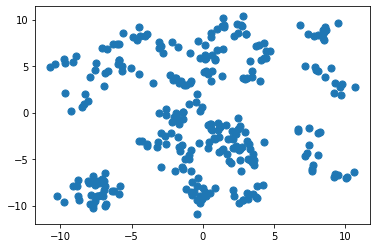

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=50 ,
                       cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

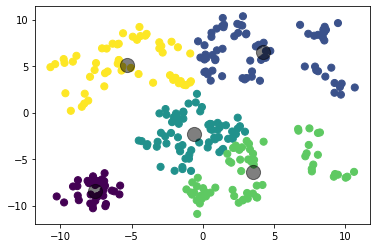

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
print(centers, '\n')
print(centers[:,:], '\n')
print(centers[:, 0], '\n')
print(centers[:, 1], '\n')

[[ 6.63839773  3.99563636]
 [-5.70147562  0.95623953]
 [ 5.98114962 -5.47332   ]
 [-0.26255498  7.04483115]
 [-5.51076326 -7.02609054]] 

[[ 6.63839773  3.99563636]
 [-5.70147562  0.95623953]
 [ 5.98114962 -5.47332   ]
 [-0.26255498  7.04483115]
 [-5.51076326 -7.02609054]] 

[ 6.63839773 -5.70147562  5.98114962 -0.26255498 -5.51076326] 

[ 3.99563636  0.95623953 -5.47332     7.04483115 -7.02609054] 



In [ ]:
# k = 1~k 做k次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=777).fit(X)
                for k in range(1, 21)]
inertias = [model.inertia_ for model in kmeans_list]

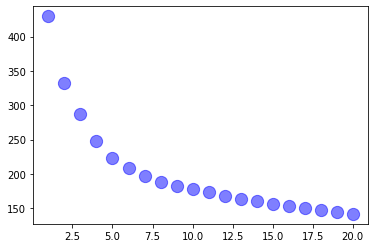

In [ ]:
plt.scatter(range(1, 21), inertias[:20], c='blue', s=150, alpha=0.5)

In [ ]:
inertias

In [ ]:
X = np.array(train_x[2])
y = np.array(train_y)
dx = X
dy = y

kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
kmeans.inertia_

196.79080504156872

In [ ]:
center = kmeans.cluster_centers_
print(len(center))

7


In [ ]:
### clusters samples number
print(pd_df(kmeans.labels_).value_counts())

6    979
4    633
1    599
2    479
3    403
0    251
5    123
dtype: int64


In [ ]:
# 取得每群資料
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []

for idx in range(len(kmeans.labels_)):
  if kmeans.labels_[idx] == 0:
    cluster0.append(idx)
  elif kmeans.labels_[idx] == 1:
    cluster1.append(idx)
  elif kmeans.labels_[idx] == 2:
    cluster2.append(idx)
  elif kmeans.labels_[idx] == 3:
    cluster3.append(idx)
  elif kmeans.labels_[idx] == 4:
    cluster4.append(idx)
  elif kmeans.labels_[idx] == 5:
    cluster5.append(idx)
  else:
    cluster6.append(idx)
# cluster = [[0]*1] * len(kmeans.cluster_centers_)
# print("cluster number :", len(kmeans.cluster_centers_))

# for idx in range(len(kmeans.labels_)):
#   if kmeans.labels_[idx] == 0:
#     cluster[0].append(idx)
#   elif kmeans.labels_[idx] == 1:
#     cluster[1].append(idx)
#   elif kmeans.labels_[idx] == 2:
#     cluster[2].append(idx)
#   elif kmeans.labels_[idx] == 3:
#     cluster[3].append(idx)
#   elif kmeans.labels_[idx] == 4:
#     cluster[4].append(idx)
#   elif kmeans.labels_[idx] == 5:
#     cluster[5].append(idx)
#   else:
#     cluster[6].append(idx)

#
my_var = pd_df(kmeans.labels_ )
ratio = 0.5
sample_required = ratio * len(my_var)

print(len(my_var.value_counts()), "clusters: ")

clusters = []
cluster_id = 6
for cluster_id in range(len(my_var.value_counts())):
  print("Cluster - ", cluster_id, ":", end=' ')
  print(len(my_var[my_var[0] == cluster_id].index.tolist()))
  print((my_var[my_var[0] == cluster_id].index.tolist()))

#
total = len(my_var)
composition_ratio = (my_var.value_counts().loc[3]) / total
print(round((0.2*total)))
print(round(float(composition_ratio)*round((0.2*total))))

7 clusters: 
Cluster -  0 : 251
[16, 19, 21, 23, 24, 53, 65, 67, 123, 134, 136, 157, 194, 202, 296, 317, 320, 327, 333, 339, 409, 437, 442, 454, 474, 511, 522, 523, 545, 599, 615, 621, 654, 694, 697, 707, 733, 739, 751, 752, 780, 786, 797, 805, 847, 890, 895, 902, 912, 938, 939, 940, 941, 943, 944, 948, 950, 957, 961, 965, 967, 985, 999, 1021, 1034, 1035, 1040, 1047, 1068, 1087, 1093, 1094, 1105, 1111, 1148, 1167, 1171, 1172, 1193, 1195, 1198, 1199, 1207, 1208, 1225, 1227, 1228, 1270, 1275, 1279, 1298, 1313, 1333, 1339, 1359, 1369, 1450, 1474, 1478, 1488, 1492, 1493, 1500, 1501, 1528, 1530, 1539, 1541, 1544, 1557, 1567, 1577, 1580, 1583, 1593, 1608, 1629, 1648, 1663, 1688, 1697, 1707, 1712, 1725, 1732, 1734, 1739, 1749, 1758, 1760, 1815, 1816, 1818, 1841, 1849, 1853, 1855, 1873, 1878, 1898, 1900, 1924, 1953, 1973, 1989, 1991, 2013, 2058, 2059, 2069, 2070, 2099, 2109, 2123, 2124, 2130, 2133, 2134, 2138, 2140, 2168, 2175, 2179, 2187, 2193, 2197, 2210, 2243, 2310, 2318, 2324, 2339, 2340, 

In [ ]:
len(cluster[1])
print(cluster[0])

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

In [ ]:
for idx in range(len(y_kmeans)):
  if (kmeans.labels_)[idx] != y_kmeans[idx]:
    print("no")

In [ ]:
# k = 1~k 做k次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=777).fit(X)
                for k in range(1, 51)]
inertias = [model.inertia_ for model in kmeans_list]

In [ ]:
kmeans.inertia_

196.79080504156872

In [ ]:
##########

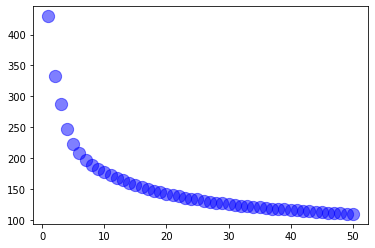

In [ ]:
plt.scatter(range(1, 51), inertias[:50], c='blue', s=150, alpha=0.5)

In [ ]:
printAllOn()
print(kmeans.labels_)
printAllOff()

In [ ]:
X = X_train_list[2]
X_train_kmeans_list = [KMeans(n_clusters=k, random_state=777).fit(X)
                for k in range(1, 51)]
X_train_inertias = [model.inertia_ for model in X_train_kmeans_list]

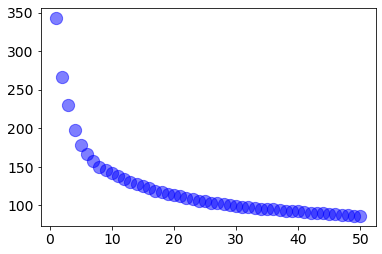

In [ ]:
plt.scatter(range(1, 51), X_train_inertias[:50], c='blue', s=150, alpha=0.5)

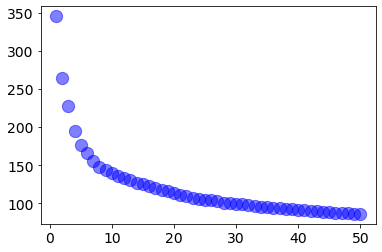

In [ ]:
plt.scatter(range(1, 51), inertias[:50], c='blue', s=150, alpha=0.5)

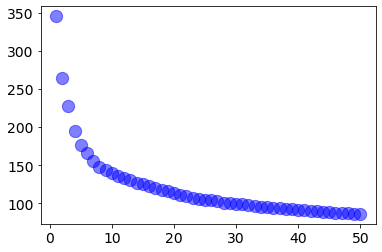

In [ ]:
# 2
plt.scatter(range(1, 51), inertias[:50], c='blue', s=150, alpha=0.5)

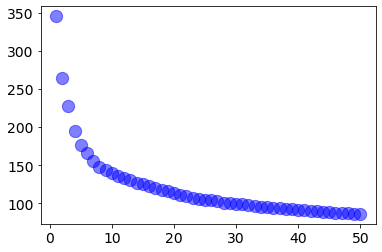

In [ ]:
# 3
plt.scatter(range(1, 51), inertias[:50], c='blue', s=150, alpha=0.5)

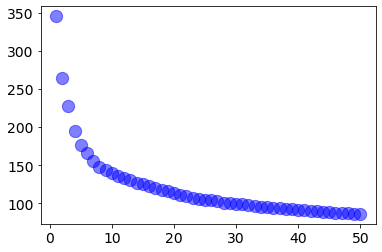

In [ ]:
plt.scatter(range(1, 51), inertias[:50], c='blue', s=150, alpha=0.5)

In [ ]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []

# 取得每群資料
for idx in range(len(kmeans.labels_)):
  if kmeans.labels_[idx] == 0:
    cluster0.append(idx)
  elif kmeans.labels_[idx] == 1:
    cluster1.append(idx)
  elif kmeans.labels_[idx] == 2:
    cluster2.append(idx)
  elif kmeans.labels_[idx] == 3:
    cluster3.append(idx)
  elif kmeans.labels_[idx] == 4:
    cluster4.append(idx)
  elif kmeans.labels_[idx] == 5:
    cluster5.append(idx)
  else:
    cluster6.append(idx)

In [ ]:
len(cluster1)

599

In [ ]:
### clusters samples number
print(pd_df(X_train_kmeans_list[6].labels_).value_counts())

3    793
6    488
4    466
1    408
0    328
2    191
5    100
dtype: int64


In [ ]:
total = len(my_var)
composition_ratio = (my_var.value_counts().loc[3]) / total
print(round((0.2*total)))
print(round(float(composition_ratio)*round((0.2*total))))

555
159


In [ ]:
my_var = pd_df(X_train_kmeans_list[6].labels_ )
sample_required = ratio * len(my_var)

print(len(my_var.value_counts()), "clusters: ")

clusters = []
cluster_id = 6
for cluster_id in range(len(my_var.value_counts())):
  print("Cluster - ", cluster_id, ":", end=' ')
  print(len(my_var[my_var[0] == cluster_id].index.tolist()))
  print((my_var[my_var[0] == cluster_id].index.tolist()))



In [ ]:
cluster_num = pd_df(X_train_kmeans_list[6].labels_).value_counts()
print(cluster_num.index[0])

(3,)


In [ ]:
center_distance = kmeans.transform(dx)
print(center_distance)

[[0.54366958 0.24821313 0.19429964 ... 0.2824649  0.59955645 0.41810379]
 [0.35742777 0.51673857 0.45219319 ... 0.31067826 0.61051783 0.75792487]
 [0.55446895 0.28463245 0.33280726 ... 0.36081471 0.66400743 0.50297987]
 ...
 [0.97456767 0.70841416 0.52177084 ... 0.71430839 0.80470615 0.43462999]
 [1.0269511  0.72194817 0.56917375 ... 0.78119444 0.99749344 0.37009403]
 [0.76404633 0.6024975  0.32253147 ... 0.51873931 0.71016146 0.35404172]]


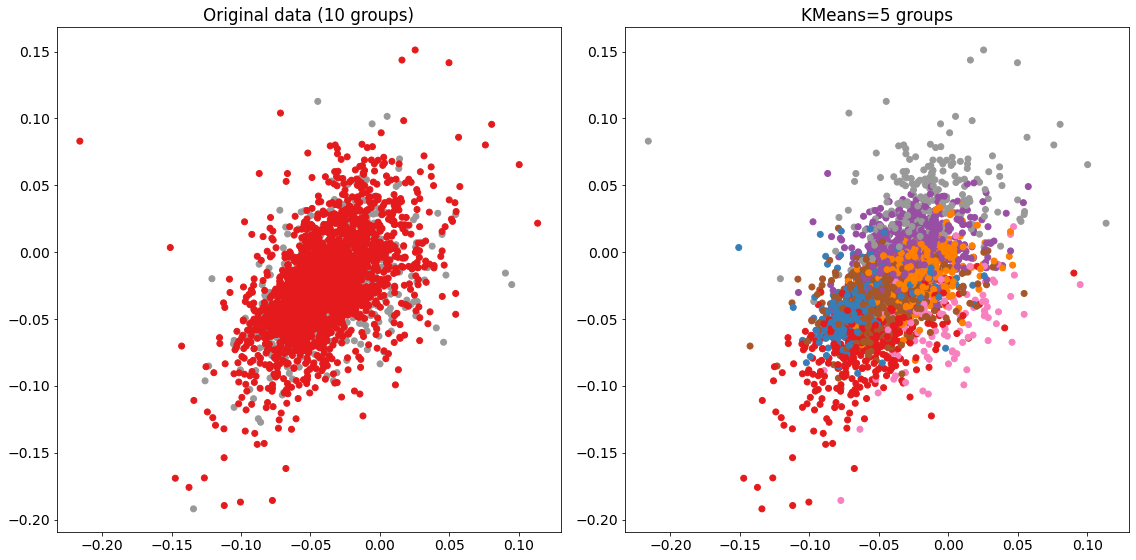

In [ ]:
# 用 KMeans 在資料中找出 5 個分組
kmeans = KMeans(n_clusters=7)
kmeans.fit(dx)
# 預測新的目標值 label
new_dy = kmeans.predict(dx)
plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
# 以不同顏色畫出原始的 10 群資料
plt.subplot(121)
plt.title('Original data (10 groups)')
plt.scatter(dx.T[0], dx.T[1], c=dy, cmap=plt.cm.Set1)
# 根據重新分成的 5 組來畫出資料
plt.subplot(122)
plt.title('KMeans=5 groups')
plt.scatter(dx.T[0], dx.T[1], c=new_dy, cmap=plt.cm.Set1)
# 顯示圖表
plt.tight_layout()
plt.show()

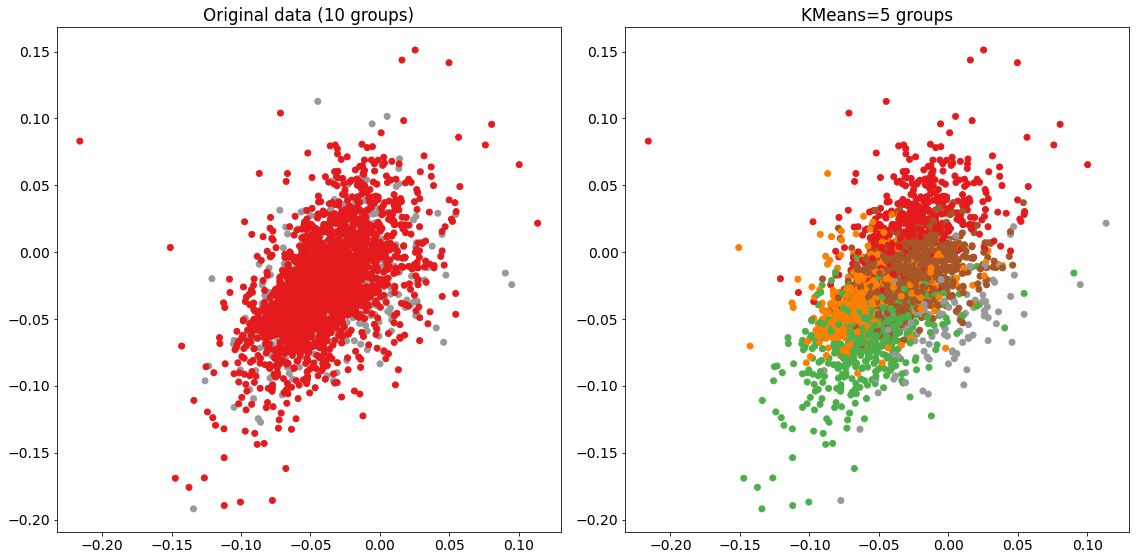

In [ ]:
# 用 KMeans 在資料中找出 5 個分組
kmeans = KMeans(n_clusters=5)
kmeans.fit(dx)
# 預測新的目標值 label
new_dy = kmeans.predict(dx)
plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
# 以不同顏色畫出原始的 10 群資料
plt.subplot(121)
plt.title('Original data (10 groups)')
plt.scatter(dx.T[0], dx.T[1], c=dy, cmap=plt.cm.Set1)
# 根據重新分成的 5 組來畫出資料
plt.subplot(122)
plt.title('KMeans=5 groups')
plt.scatter(dx.T[0], dx.T[1], c=new_dy, cmap=plt.cm.Set1)
# 顯示圖表
plt.tight_layout()
plt.show()

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0],
             [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
# kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
kmeans.cluster_centers_
# array([[10.,  2.],
      #  [ 1.,  2.]])
cluster = 0
N = 2
np.sort(kmeans.transform(X)[:,cluster])[:N]

array([0., 2.])

In [ ]:
### PCA ###

In [ ]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_scaled[0:5]

array([[ 0.67302107,  0.86569253, -0.5707979 , ...,  1.29884135,
        -0.74331516, -0.22394734],
       [-0.80543174,  0.34602576,  0.24262279, ..., -0.23541972,
        -0.67132135, -0.40255015],
       [ 0.27639029,  0.54568885, -0.81762007, ...,  1.50359022,
        -2.59272012,  1.75472121],
       [-0.13708505,  0.16294024,  0.33728039, ...,  0.06701212,
         1.03459244, -0.15099921],
       [-0.47846366, -0.56506902,  1.01672157, ..., -0.91133866,
        -0.23863918,  0.89657356]])

In [ ]:
# 进行PCA数据降维
from sklearn.decomposition import PCA

# 生成PCA实例
pca = PCA(n_components=3) # 柶维度降至3维
# 讲行PCA降维
X_pca = pca.fit_transform(X_scaled)
# 生成隆维后的dataframe
X_pca_frame = pd.DataFrame(X_pca, columns=['pca_1', 'pca_2', 'pca_3'])
X_pca_frame.head()

,pca_1,pca_2,pca_3
0,3.887101,3.828679,-1.570584
1,-4.049352,-5.837952,-1.369540
2,3.607745,6.840207,-3.184336
3,0.896104,-0.479576,0.653179
4,-2.923835,5.370271,4.279160


In [ ]:
est = KMeans(n_clusters=5)

est.fit(X_pca)

KMeans(n_clusters=5)

In [ ]:
kmeans_clustering_labels = pd.DataFrame(est.labels_, columns=['cluster'])
X_pca_frame = pd.concat([X_pca_frame, kmeans_clustering_labels], axis=1)

X_pca_frame.head()

,pca_1,pca_2,pca_3,cluster
0,3.887101,3.828679,-1.570584,4
1,-4.049352,-5.837952,-1.369540,1
2,3.607745,6.840207,-3.184336,4
3,0.896104,-0.479576,0.653179,1
4,-2.923835,5.370271,4.279160,4


In [ ]:
np.array(X_pca_frame)

array([[ 3.88710065,  3.82867919, -1.57058393,  4.        ],
       [-4.04935247, -5.83795175, -1.36953955,  1.        ],
       [ 3.60774466,  6.84020654, -3.18433649,  4.        ],
       ...,
       [14.13464682, -1.82755709,  4.54900303,  0.        ],
       [16.76354557,  5.06243274, -6.50801013,  0.        ],
       [10.19746815, -5.86674235, -1.53695685,  0.        ]])

In [ ]:
X_pca_frame

,pca_1,pca_2,pca_3,cluster
0,3.887101,3.828679,-1.570584,4
1,-4.049352,-5.837952,-1.369540,1
2,3.607745,6.840207,-3.184336,4
3,0.896104,-0.479576,0.653179,1
4,-2.923835,5.370271,4.279160,4
...,...,...,...,...
3462,2.592351,11.760697,1.281132,4
3463,14.365222,-3.214870,-4.262804,0
3464,14.134647,-1.827557,4.549003,0
3465,16.763546,5.062433,-6.508010,0


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

d ={}
fig_reduced_data = plt.figure(figsize=(12,12))
for k in range(2,14):
  est = KMeans(n_clusters=k, random_state=111)

  y_pred= est.fit_predict(X_pca)

  calinski_harabaz_score= calinski_harabasz_score(np.array(X_pca_frame), y_pred)
  d.update({k: calinski_harabaz_score})
  print('calinski_harabasz_score with k={0} is {1}'.format(k, calinski_harabaz_score))

  ax = plt.subplot(4, 3, k-1, projection='3d')
  ax.scatter(X_pca_frame.pca_1, X_pca_frame.pca_2, X_pca_frame.pca_3, c=y_pred)
  ax.set_xlabel('pca_1')
  ax.set_ylabel('pca_2')
  ax.set_zlabel('pca_3')

TypeError: ignored

<Figure size 864x864 with 0 Axes>

# 測試 & 評估 - Validation

In [242]:
# Prepare classifiers

svm_score = [[],[],[],[],[]]
dtree_score = [[],[],[],[],[]]
RF_score = [[],[],[],[],[]]
XGB_score = [[],[],[],[],[]]

roc_auc = []
f1 = []
f1_sarcastic = []
precision = []
recall = []

clf_svm = svm.SVC()
clf_dtree = DecisionTreeClassifier()
clf_RF = RandomForestClassifier()
clf_XGB = XGBClassifier()

clf_set = [clf_svm, clf_dtree, clf_RF, clf_XGB]

Oversampling_method = ["Poly", "Prow", "IPF"]
clf_score = [svm_score, dtree_score, RF_score, XGB_score]
clf_name = ['svm_score', 'dtree_score', 'RF_score', 'XGB_score']
metric = [roc_auc, f1, f1_sarcastic, precision, recall]
metric_name = ['roc_auc', 'f1', 'f1_sarcastic', 'precision', 'recall']

In [162]:
#@title 預設標題文字 { vertical-output: true }

count = -1

def fit_predict():
  
  for clf_idx in range(len(clf_set)): # 0 - 3
    clf = clf_set[clf_idx]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    roc_auc.append(roc_auc_score(y_validation, y_pred))

  count = count + 4

  print(count)
  svm_score.append(roc_auc[count-3])
  dtree_score.append(roc_auc[count-2])
  RF_score.append(roc_auc[count-1])
  XGB_score.append(roc_auc[count])

def save_score(classifier_score, clf_id):
  classifier_score[0].append(roc_auc[count-clf_id])
  classifier_score[1].append(f1[count-clf_id])
  classifier_score[2].append(f1_sarcastic[count-clf_id])
  # classifier_score[3].append(precision[count-clf_id])
  # classifier_score[4].append(recall[count-clf_id])

In [250]:
### clear testing results

svm_score = [[],[],[],[],[]]
dtree_score = [[],[],[],[],[]]
RF_score = [[],[],[],[],[]]
XGB_score = [[],[],[],[],[]]

roc_auc = []
f1 = []
f1_sarcastic = []
precision = []
recall = []

my_auc = [roc_auc, f1, f1_sarcastic, precision, recall]

In [253]:
print(len(f1))

240


In [252]:
# def EO_train(ensemble_type):
ensemble_type = EO3_set[3]

count = -1
for perm_idx in range(len(ensemble_type[0])): # 12 or 15
  for fold_idx in range(5): # 5

    X_train = ensemble_type[0][perm_idx][fold_idx]
    y_train = ensemble_type[1][perm_idx][fold_idx]

    X_validation = X_validation_list[fold_idx]
    y_validation = y_validation_list[fold_idx]

    # 4 models
    # fit_predict(X_train, y_train, X_validation, y_validation) #
    for clf_idx in range(len(clf_set)): # 0 - 3
      clf = clf_set[clf_idx]
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_validation)

      roc_auc.append(roc_auc_score(y_validation, y_pred))
      f1.append(f1_score(y_validation, y_pred))
      f1_sarcastic.append(f1_score(y_validation, y_pred, average=None))
      # precision.append(precision_score(y_validation, y_pred))
      # recall.append(recall_score(y_validation, y_pred))

    count = count + 4

    print(count, ' ', end='')

    save_score(svm_score, 3)
    save_score(dtree_score, 2)
    save_score(RF_score, 1)
    save_score(XGB_score, 0)

# clf_score = [svm_score, dtree_score, RF_score, XGB_score]

3  7  11  15  19  23  27  31  35  39  43  47  51  55  59  63  67  71  75  79  83  87  91  95  99  103  107  111  115  119  123  127  131  135  139  143  147  151  155  159  163  167  171  175  179  183  187  191  195  199  203  207  211  215  219  223  227  231  235  239  

In [266]:
def single_algo_average_score(score_board, fold_size):
  start = 0
  end = start+fold_size

  for idx in range(len(score_board)//fold_size):
    print(Oversampling_method[idx]+':', sum(score_board[start:end])/fold_size)
    start = start+fold_size
    end = end+fold_size

def ensemble_average_score(score_board, fold_size):
  start = 0
  end = start+fold_size # fold = 5

  Sum = []
  for idx in range(len(score_board)//fold_size):
    print(score_board[start:end], end='')
    Sum.append(sum(score_board[start:end])/fold_size)
    # print(' Sum :', sum(score_board[start:end])/fold_size)
    print()
    start = start+fold_size
    end = end+fold_size
  
  print()
  print('Sum :')
  for i in Sum:
    print(i)
  print()
  # Sum = np.sort(Sum)
  # for i in Sum:
  #   print(i)

def f1_sarc_average(score_board, fold_size):
  start = 0
  end = start+fold_size # fold = 5

  Sum = []
  for idx in range(len(score_board)//fold_size):
    print(score_board[start:end], end='')
    Sum.append(sum(score_board[start:end])/fold_size)
    # print(' Sum :', sum(score_board[start:end])/fold_size)
    print()
    start = start+fold_size
    end = end+fold_size
  
  print()
  print('Sum :')
  for i in Sum:
    print(i)
  print()

  # f1_sarc = []
  # for i in range(len(Sum)):
  #   f1_sarc.append(Sum[i][1])

  # f1_sarc = (np.sort(f1_sarc))
  # npPrintAllOn()
  # print(f1_sarc)
  # npPrintAllOff()
  # print()

# Main
def show_score():
  # clf_score = [svm_score, dtree_score, RF_score, XGB_score]
  for clf_idx in range(len(clf_score)): # 4
    for metric_idx in range(3): # 5
      print('\033[1m' + clf_name[clf_idx]+' : '+metric_name[metric_idx] +'\033[0m')
      if metric_idx != 2:
        ensemble_average_score(clf_score[clf_idx][metric_idx], 5) #
        print()
      else:
        f1_sarc_average(clf_score[clf_idx][metric_idx], 5)
        print()


def calculate_max(score_board, fold_size):
  start = 0
  end = start+fold_size # fold = 5

  Sum = []
  for idx in range(len(score_board)//fold_size):
    Sum.append(sum(score_board[start:end])/fold_size)
    start = start+fold_size
    end = end+fold_size
  
  # Sum = np.sort(Sum)
  # for i in Sum:
  #   print(i)

  best = max(Sum)
  print(' Best :\n', best)

def calculate_max_f1_sarc(score_board, fold_size):
  start = 0
  end = start+fold_size # fold = 5

  Sum = []
  for idx in range(len(score_board)//fold_size):
    Sum.append(sum(score_board[start:end])/fold_size)
    start = start+fold_size
    end = end+fold_size

  f1_sarc = []
  for i in range(len(Sum)):
    f1_sarc.append(Sum[i][1])

  f1_sarc = (np.sort(f1_sarc))
  # npPrintAllOn()
  # printAll(f1_sarc)
  # npPrintAllOff()
  # print()

  best = max(f1_sarc)
  print(' Best :\n', best)

# Main
def show_best_score():
  # clf_score = [svm_score, dtree_score, RF_score, XGB_score]
  for clf_idx in range(len(clf_score)): # 4
    for metric_idx in range(2): # 5
      print('\033[1m' + clf_name[clf_idx]+' : '+metric_name[metric_idx] +'\033[0m')
      # if metric_idx != 2:
      calculate_max(clf_score[clf_idx][metric_idx], 5) #
      print()
      # else:
      # calculate_max_f1_sarc(clf_score[clf_idx][metric_idx], 5)
      # print()

In [267]:
#@title EO3 Cluster Center Best { vertical-output: true, form-width: "80%" }
show_best_score()

svm_score : roc_auc
 Best :
 0.536995625130965

svm_score : f1
 Best :
 0.3771178180557242

dtree_score : roc_auc
 Best :
 0.5272029331043682

dtree_score : f1
 Best :
 0.3336410987883083

RF_score : roc_auc
 Best :
 0.543032522755963

RF_score : f1
 Best :
 0.29699185244794485

XGB_score : roc_auc
 Best :
 0.54317664811436

XGB_score : f1
 Best :
 0.3460314296176142



In [256]:
#@title EO3 Cluster Center { vertical-output: true, form-width: "80%" }
show_score()

svm_score : roc_auc
[0.5183908045977011, 0.5644562334217507, 0.49074032903512677, 0.5437305469097377, 0.5360604713205869]
[0.516445623342175, 0.5558023872679045, 0.49846598488216987, 0.5630002223210315, 0.5322032014228546]
[0.5296529619805482, 0.5671529619805482, 0.47543352601156075, 0.5592207647843486, 0.5322754557581147]
[0.5374668435013262, 0.5557250221043325, 0.4994553134726545, 0.5534126278345931, 0.5274455313472655]
[0.5182250221043324, 0.560422192749779, 0.5043241440640285, 0.5447698977323254, 0.5409404179635393]
[0.5251436781609196, 0.5578028293545535, 0.4974655402401067, 0.5485271231658515, 0.5312138728323699]
[0.5107758620689655, 0.5740937223695844, 0.5070920409070698, 0.5456369497554469, 0.5341040462427746]
[0.522844827586207, 0.5651525198938991, 0.49764339706536237, 0.5505724766562916, 0.5428968430413517]
[0.5517793987621573, 0.555658709106985, 0.49370831480658073, 0.5524899955535794, 0.5313417074255224]
[0.5317418213969938, 0.5519341290893015, 0.48883948421520673, 0.555319

In [249]:
#@title EO2 Cluster Center Best { vertical-output: true, form-width: "80%" }
show_best_score()

svm_score : roc_auc
0.5306756770569806
0.5320273122664989
0.5320306087507601
0.5327471341030241
0.5329779646637329
0.5329988296203165
0.5331834838472271
0.5336954866275179
0.533736334922801
0.5343405242687682
0.5345143307625866
0.5346856968358862
0.5347010676520344
0.5358220128486224
0.536995625130965

 Best :
 0.536995625130965

svm_score : f1
0.34075234350154654
0.3422291762835498
0.3432838020995769
0.3438992369078852
0.34478273568606543
0.35046264710898856
0.35429687479948846
0.360631409270573
0.3625626370555034
0.3665953949548118
0.3668795925941952
0.3671121538828658
0.3698402126179537
0.3727029894427393
0.3771178180557242

 Best :
 0.3771178180557242

svm_score : f1_sarcastic
[0.34075234 0.34222918 0.3432838  0.34389924 0.34478274 0.35046265
 0.35429687 0.36063141 0.36256264 0.36659539 0.36687959 0.36711215
 0.36984021 0.37270299 0.37711782]

 Best :
 0.3771178180557242

dtree_score : roc_auc
0.4839854878030082
0.5005227994050996
0.5007294940791054
0.5010899352458053
0.50128220460

In [244]:
#@title EO2 Cluster Center { vertical-output: true, form-width: "80%" }
show_score()

svm_score : roc_auc
[0.5183908045977011, 0.5644562334217507, 0.49074032903512677, 0.5437305469097377, 0.5360604713205869]
[0.516445623342175, 0.5558023872679045, 0.49846598488216987, 0.5630002223210315, 0.5322032014228546]
[0.5296529619805482, 0.5671529619805482, 0.47543352601156075, 0.5592207647843486, 0.5322754557581147]
[0.5374668435013262, 0.5557250221043325, 0.4994553134726545, 0.5534126278345931, 0.5274455313472655]
[0.5182250221043324, 0.560422192749779, 0.5043241440640285, 0.5447698977323254, 0.5409404179635393]
[0.5251436781609196, 0.5578028293545535, 0.4974655402401067, 0.5485271231658515, 0.5312138728323699]
[0.5107758620689655, 0.5740937223695844, 0.5070920409070698, 0.5456369497554469, 0.5341040462427746]
[0.522844827586207, 0.5651525198938991, 0.49764339706536237, 0.5505724766562916, 0.5428968430413517]
[0.5517793987621573, 0.555658709106985, 0.49370831480658073, 0.5524899955535794, 0.5313417074255224]
[0.5317418213969938, 0.5519341290893015, 0.48883948421520673, 0.555319

In [182]:
#@title EO3 Cluster Random Best { vertical-output: true, form-width: "80%" }
show_best_score()

svm_score : roc_auc
0.5300932853937639
0.5335925928765276
0.5347208337805308
0.535886984253538
0.5360651349514216
0.5363976582184675
0.5379859247788289
0.5385227917388572
0.538856707706618
0.5389375993417252
0.5397177545064729
0.5400072318220615
0.5400503799900849
0.5421789505425144
0.5425504310983681

 Best :
 0.5425504310983681

svm_score : f1
0.34850007102124153
0.35106300501026844
0.3568926364254238
0.3584525800703985
0.36026760676872566
0.3679616522152823
0.3679658596625637
0.36875229486059463
0.36943677643236833
0.3711238712413048
0.37123143629567873
0.37227855880289595
0.3728844127354638
0.3745560505088368
0.3757831120114711

 Best :
 0.3757831120114711

svm_score : f1_sarcastic
[0.34850007 0.35106301 0.35689264 0.35845258 0.36026761 0.36796165
 0.36796586 0.36875229 0.36943678 0.37112387 0.37123144 0.37227856
 0.37288441 0.37455605 0.37578311]

 Best :
 0.3757831120114711

dtree_score : roc_auc
0.49798384211629176
0.501274346708371
0.5026295339435662
0.5036043222275034
0.504934

In [185]:
#@title EO3 Cluster Random { vertical-output: true, form-width: "80%" }
show_score()

svm_score : roc_auc
[0.5413240495137047, 0.5413240495137047, 0.5413240495137047, 0.5615053050397878, 0.5071365051133837]
[0.5389506447309915, 0.5380224544241885, 0.5537577365163573, 0.5604885057471264, 0.5196754112939084]
[0.5418574922187639, 0.5351600711427301, 0.5421640141467727, 0.5517462422634836, 0.5110604713205869]
[0.5476934192974656, 0.5275233437083148, 0.5441644562334217, 0.561472148541114, 0.5090762561138283]
[0.5611160515784793, 0.5380391285015562, 0.5402298850574713, 0.5623010610079575, 0.5110660293463761]
[0.5438250333481547, 0.5275066696309471, 0.5318081343943413, 0.5605990274093722, 0.5042240995998222]
[0.5437472209871054, 0.5399177412183193, 0.5327586206896552, 0.5500663129973474, 0.5071142730102268]
[0.5485493552690085, 0.5399232992441084, 0.54881741821397, 0.5641688770999116, 0.4928245887060916]
[0.5371164962205425, 0.5285071142730102, 0.5422082228116711, 0.557603890362511, 0.5148899510893731]
[0.5572865718096932, 0.5342318808359271, 0.5393788682581786, 0.555725022104

In [172]:
#@title EO2 Cluster Random Best (2) { vertical-output: true, form-width: "80%" }
show_best_score()

svm_score : roc_auc
0.5300932853937639
0.5335925928765276
0.5347208337805308
0.535886984253538
0.5360651349514216
0.5363976582184675
0.5379859247788289
0.5385227917388572
0.538856707706618
0.5389375993417252
0.5397177545064729
0.5400072318220615
0.5400503799900849
0.5421789505425144
0.5425504310983681

 Best :
 0.5425504310983681

svm_score : f1
0.34850007102124153
0.35106300501026844
0.3568926364254238
0.3584525800703985
0.36026760676872566
0.3679616522152823
0.3679658596625637
0.36875229486059463
0.36943677643236833
0.3711238712413048
0.37123143629567873
0.37227855880289595
0.3728844127354638
0.3745560505088368
0.3757831120114711

 Best :
 0.3757831120114711

svm_score : f1_sarcastic
[0.34850007 0.35106301 0.35689264 0.35845258 0.36026761 0.36796165
 0.36796586 0.36875229 0.36943678 0.37112387 0.37123144 0.37227856
 0.37288441 0.37455605 0.37578311]

 Best :
 0.3757831120114711

dtree_score : roc_auc
0.49798384211629176
0.501274346708371
0.5026295339435662
0.5036043222275034
0.504934

In [173]:
#@title EO2 Cluster Random (2) { vertical-output: true, form-width: "80%" }
show_score()

svm_score : roc_auc
[0.5413240495137047, 0.5413240495137047, 0.5413240495137047, 0.5615053050397878, 0.5071365051133837]
[0.5389506447309915, 0.5380224544241885, 0.5537577365163573, 0.5604885057471264, 0.5196754112939084]
[0.5418574922187639, 0.5351600711427301, 0.5421640141467727, 0.5517462422634836, 0.5110604713205869]
[0.5476934192974656, 0.5275233437083148, 0.5441644562334217, 0.561472148541114, 0.5090762561138283]
[0.5611160515784793, 0.5380391285015562, 0.5402298850574713, 0.5623010610079575, 0.5110660293463761]
[0.5438250333481547, 0.5275066696309471, 0.5318081343943413, 0.5605990274093722, 0.5042240995998222]
[0.5437472209871054, 0.5399177412183193, 0.5327586206896552, 0.5500663129973474, 0.5071142730102268]
[0.5485493552690085, 0.5399232992441084, 0.54881741821397, 0.5641688770999116, 0.4928245887060916]
[0.5371164962205425, 0.5285071142730102, 0.5422082228116711, 0.557603890362511, 0.5148899510893731]
[0.5572865718096932, 0.5342318808359271, 0.5393788682581786, 0.555725022104

In [ ]:
#@title EO2 Cluster Random Best { vertical-output: true, form-width: "80%" }
show_best_score()

svm_score : roc_auc
0.5331735432861604
0.5337438095092072
0.5342868989027052
0.5356823722420693
0.5360374981473247
0.536059244721792
0.5369857356781813
0.5373877917644112
0.5373944997265707
0.5396746574467324
0.5398593883360677
0.5400825526543087
0.5412441033818352
0.5421878433837772
0.54277360819368

 Best :
 0.54277360819368

svm_score : f1
0.35150525826715506
0.351547829207864
0.3518356863832293
0.35263095308634185
0.36006835893926425
0.36348926533766934
0.3690863889945893
0.3696607116032587
0.37257388869296826
0.3728603673873784
0.3733461690760255
0.3736358224528334
0.374086628889866
0.3768484700602599
0.38049718859843096

 Best :
 0.38049718859843096

svm_score : f1_sarcastic
[0.35150526 0.35154783 0.35183569 0.35263095 0.36006836 0.36348927
 0.36908639 0.36966071 0.37257389 0.37286037 0.37334617 0.37363582
 0.37408663 0.37684847 0.38049719]

 Best :
 0.38049718859843096

svm_score : precision
0.2734891225358252
0.27581425273270643
0.2768000725349143
0.27755827526729143
0.27888573

In [ ]:
#@title EO2 Cluster Random Best { vertical-output: true, form-width: "80%" }
show_score()

svm_score : roc_auc
[0.5413240495137047, 0.5615053050397878, 0.5071365051133837, 0.5389506447309915, 0.5380224544241885]
[0.5537577365163573, 0.5604885057471264, 0.5196754112939084, 0.5418574922187639, 0.5351600711427301]
[0.5421640141467727, 0.5517462422634836, 0.5110604713205869, 0.5476934192974656, 0.5275233437083148]
[0.5441644562334217, 0.561472148541114, 0.5090762561138283, 0.5611160515784793, 0.5380391285015562]
[0.5402298850574713, 0.5623010610079575, 0.5110660293463761, 0.5438250333481547, 0.5275066696309471]
[0.5318081343943413, 0.5605990274093722, 0.5042240995998222, 0.5437472209871054, 0.5399177412183193]
[0.5327586206896552, 0.5500663129973474, 0.5071142730102268, 0.5485493552690085, 0.5399232992441084]
[0.54881741821397, 0.5641688770999116, 0.4928245887060916, 0.5371164962205425, 0.5285071142730102]
[0.5422082228116711, 0.557603890362511, 0.5148899510893731, 0.5572865718096932, 0.5342318808359271]
[0.5393788682581786, 0.5557250221043325, 0.511966429524233, 0.5428245887060

In [ ]:
#@title EO3 Center Best { vertical-output: true, form-width: "80%" }
show_best_score()

svm_score : roc_auc
0.5206932966375861
0.5218713170093477
0.5231976025104389
0.5249217404414732
0.5251317060455989
0.5251328432048983
0.5253097161957039
0.5264735667959706
0.5272251396533837
0.5274273495755457
0.5281899234909002
0.528966986604519

 Best :
 0.528966986604519

svm_score : f1
0.3174503162092432
0.32141995184912
0.32371761716252606
0.32372472314479694
0.3260011864212665
0.3292326212400245
0.33074747983295766
0.3329851740070221
0.33311378682633774
0.3331954788711625
0.3377124507258817
0.3389882753014891

 Best :
 0.3389882753014891

svm_score : f1_sarcastic
[0.31745032 0.32141995 0.32371762 0.32372472 0.32600119 0.32923262
 0.33074748 0.33298517 0.33311379 0.33319548 0.33771245 0.33898828]

 Best :
 0.3389882753014891

svm_score : precision
0.269799077328464
0.27442811929697053
0.27482151220997997
0.2761450463851239
0.2763172194097604
0.27633138538471297
0.2767779337504294
0.2770980230441732
0.2776795671023792
0.2776990626132256
0.27780917788902526
0.27904821345661085

 Bes

In [ ]:
#@title EO3 Center { vertical-output: true, form-width: "80%" }
show_score()

svm_score : roc_auc
[0.5146330680813439, 0.5492152961980549, 0.49841596265006666, 0.5273176967541129, 0.5350266785237883]
[0.5146220159151194, 0.5396441202475685, 0.5051634059582036, 0.5350100044464207, 0.5215484659848821]
[0.5126436781609196, 0.5539566755083997, 0.49844375277901287, 0.5331313917296576, 0.5379502000889285]
[0.5165229885057472, 0.5444186560565871, 0.5070920409070698, 0.5321420631391729, 0.5263728323699421]
[0.516500884173298, 0.547292219274978, 0.5090151178301467, 0.5388728323699421, 0.5292685638061361]
[0.5098585322723254, 0.5396551724137931, 0.5051522899066252, 0.5350100044464207, 0.5359882169853267]
[0.5174403183023872, 0.5424624226348365, 0.5003612716763006, 0.5475767007558915, 0.5369942196531792]
[0.5059239610963749, 0.5395667550839964, 0.49844375277901287, 0.5283181413961762, 0.5312138728323699]
[0.5012378426171529, 0.5358421750663129, 0.5109270787016452, 0.5407792352156514, 0.520570253445976]
[0.5117926613616269, 0.5396662245800177, 0.508998443752779, 0.538856158

In [ ]:
#@title EO3 Random Best { vertical-output: true, form-width: "80%" }
show_best_score()

svm_score : roc_auc
0.5341143062306107
0.5372209871053801
0.5379603706372691
0.538153828265947
0.5389253205767058
0.5389296008954172
0.5394723836392165
0.5396955735115989
0.5402670280022284
0.5408605229399528
0.5422033547477039
0.5423758068720197

 Best :
 0.5423758068720197

svm_score : f1
0.36167276769814194
0.36248715645596336
0.36468836379779745
0.3663717352738568
0.36689657832455136
0.36709201787090473
0.3689383274450958
0.370039305063135
0.3701075720993252
0.3703740609436227
0.3725584663908036
0.37394897142685635

 Best :
 0.37394897142685635

svm_score : f1_sarcastic
[0.36167277 0.36248716 0.36468836 0.36637174 0.36689658 0.36709202
 0.36893833 0.37003931 0.37010757 0.37037406 0.37255847 0.37394897]

 Best :
 0.37394897142685635

svm_score : precision
0.2759546330221316
0.27976430328209057
0.279774413123132
0.28003060208686303
0.28028906113402374
0.28057214470232505
0.28131253761030056
0.28187337684870817
0.28227871243417046
0.2825692360101066
0.2825728412211041
0.28374056232373

In [ ]:
#@title EO3 random { vertical-output: true, form-width: "80%" }
show_score()

svm_score : roc_auc
[0.5422413793103448, 0.5595380194518125, 0.505218986216096, 0.5447421076033793, 0.5380613606047132]
[0.5355327144120248, 0.562422634836428, 0.5177523343708315, 0.5466818586038239, 0.5419130724766563]
[0.5604111405835543, 0.5680923961096375, 0.5196920853712761, 0.5303301467318808, 0.5188361493997332]
[0.5518236074270557, 0.5585433244916004, 0.5148732770120054, 0.5389895509115162, 0.537105380168964]
[0.5384062776304156, 0.5662245800176834, 0.5081258337038684, 0.5341651845264562, 0.5438472654513118]
[0.5528072502210434, 0.5576370468611848, 0.506191640729213, 0.5370442418852824, 0.5447976878612717]
[0.5345490716180371, 0.5642793987621574, 0.5139172965762561, 0.5418797243219209, 0.5400011116051578]
[0.552763041556145, 0.5374005305039787, 0.51586260560249, 0.5428468208092486, 0.5216985326811916]
[0.5298297966401414, 0.5499778956675508, 0.5129279679857714, 0.5495553579368608, 0.5438139172965762]
[0.5490163572060125, 0.5538019451812555, 0.5052134281903069, 0.546659626500667

In [ ]:
#@title EO2 Center Best { vertical-output: true, form-width: "80%" }
show_best_score()

svm_score : roc_auc
0.522019761017668
0.5232053326382606
0.5237845428108534
0.5260944072205782
0.5266417002703627
0.5272294966345196
0.5274209099318726
0.5276284478925499
0.5278284984897502
0.5289308402712827
0.5293119675155753
0.5306746676683891
0.530863832201285
0.5341427735443084
0.5371999049385934

Best :
 0.5371999049385934

svm_score : f1
0.32175087876287506
0.32642756675073115
0.3277914335541638
0.3279940362386939
0.3282850832102673
0.33232545990173645
0.3454743309607414
0.34654987377025986
0.3471579457757521
0.34874477162806683
0.3504947355259537
0.3532764736894851
0.35948502641288826
0.36082620502764307
0.36191567564081617

Best :
 0.36191567564081617

svm_score : f1_sarcastic
[0.32175088 0.32642757 0.32779143 0.32799404 0.32828508 0.33232546
 0.34547433 0.34654987 0.34715795 0.34874477 0.35049474 0.35327647
 0.35948503 0.36082621 0.36191568]

Best :
 0.36191567564081617

svm_score : precision
0.2679409483078396
0.27153882215106706
0.2734808628551633
0.2737721848170233
0.27386

In [ ]:
#@title EO2 Center { vertical-output: true, form-width: "80%" }
show_score()

svm_score : roc_auc
[0.5193854995579134, 0.545369142351901, 0.4964928857269897, 0.5398454868830591, 0.5350544686527345]
[0.5040671971706454, 0.5424955791335102, 0.5042129835482436, 0.5330980435749222, 0.5350489106269454]
[0.5173850574712643, 0.5433355437665782, 0.49847154290795914, 0.5466540684748776, 0.5312583370386839]
[0.5279177718832891, 0.5471485411140584, 0.495570253445976, 0.5437638950644731, 0.5389728768341485]
[0.5287687886825818, 0.5326702033598586, 0.5062249888839484, 0.5437861271676301, 0.5428690529124055]
[0.5098474801061008, 0.5415671971706454, 0.5080424633170297, 0.5359715429079591, 0.5350433526011561]
[0.5108200707338638, 0.5415671971706454, 0.5022621164962205, 0.5282625611382836, 0.5331147176522899]
[0.5373563218390804, 0.5278514588859416, 0.506236104935527, 0.5361049355269007, 0.537105380168964]
[0.5364942528735632, 0.5471153846153846, 0.49366385060026674, 0.539934415295687, 0.5293519341929747]
[0.5279509283819629, 0.5500884173297966, 0.5003668297020898, 0.55143397065

In [ ]:
#@title EO2 random Best { vertical-output: true, form-width: "80%" }
show_best_score()

svm_score : roc_auc
0.5310308157393069
0.53313519929675
0.5333724311699197
0.5335724945441908
0.5350528076335331
0.5352626454669508
0.5352868452390078
0.53831640371455
0.5399021276378263
0.540294498704405
0.540481388918702
0.5408549776912344
0.5437317607314618
0.5454638332234506
0.5466044167778272

Best :
 0.5466044167778272

svm_score : f1
0.3479931684753709
0.34801794794614416
0.35878155268083317
0.3594776528120673
0.36064437258314536
0.3660475677199396
0.3664833992415194
0.36821085517826957
0.3686114016945356
0.3689766762770672
0.3730034620202736
0.3755470513010431
0.37726419270683076
0.37763908776591737
0.3796831286788656

Best :
 0.3796831286788656

svm_score : f1_sarcastic
[0.34799317 0.34801795 0.35878155 0.35947765 0.36064437 0.36604757
 0.3664834  0.36821086 0.3686114  0.36897668 0.37300346 0.37554705
 0.37726419 0.37763909 0.37968313]

Best :
 0.3796831286788656

svm_score : precision
0.2724026425124425
0.27322352870221006
0.27392177170828597
0.2763454920092102
0.277835839926

In [ ]:
#@title EO2 random { vertical-output: true, form-width: "80%" }
show_score()

svm_score : roc_auc
[0.5422745358090185, 0.5682139699381079, 0.5052078701645175, 0.5533903957314362, 0.5495720320142286]
[0.5307913351016799, 0.5566534040671972, 0.5225711427301022, 0.5572587816807469, 0.535132281013784]
[0.5699712643678161, 0.5613395225464191, 0.5014506447309915, 0.5351600711427301, 0.5236605157847932]
[0.5355437665782493, 0.5681697612732095, 0.5206369497554468, 0.5428301467318809, 0.5370942641173855]
[0.5364058355437666, 0.552707780725022, 0.5033681636282792, 0.5438361493997332, 0.5188361493997332]
[0.5318302387267905, 0.5539014146772767, 0.5061471765228991, 0.5418130280124499, 0.5331702979101823]
[0.5241489832007074, 0.5510278514588859, 0.4945864828812806, 0.5562583370386839, 0.5418408181413962]
[0.5459549071618037, 0.5612511052166225, 0.5053245887060915, 0.5467485549132948, 0.5159848821698533]
[0.5460322723253758, 0.5690981432360743, 0.5216262783459316, 0.5534348599377501, 0.5371276122721209]
[0.5278846153846154, 0.5547634836427939, 0.5109993330369053, 0.5408959537

In [ ]:
#@title 單一演算法 { vertical-output: true, form-width: "80%" }
# 單一演算法
for clf_idx in range(len(clf_score)): # 4
  for metric_idx in range(5): # 5
    print('\033[1m' + clf_name[clf_idx]+' : '+metric_name[metric_idx] +'\033[0m')
    ensemble_average_score(clf_score[clf_idx][metric_idx], 5) #
    print()

svm_score : roc_auc
[0.5422745358090185, 0.5682139699381079, 0.5052078701645175, 0.5533903957314362, 0.5495720320142286]
[0.5307913351016799, 0.5566534040671972, 0.5225711427301022, 0.5572587816807469, 0.535132281013784]
[0.5699712643678161, 0.5613395225464191, 0.5014506447309915, 0.5351600711427301, 0.5236605157847932]
[0.5355437665782493, 0.5681697612732095, 0.5206369497554468, 0.5428301467318809, 0.5370942641173855]
[0.5364058355437666, 0.552707780725022, 0.5033681636282792, 0.5438361493997332, 0.5188361493997332]
[0.5318302387267905, 0.5539014146772767, 0.5061471765228991, 0.5418130280124499, 0.5331702979101823]
[0.5241489832007074, 0.5510278514588859, 0.4945864828812806, 0.5562583370386839, 0.5418408181413962]
[0.5459549071618037, 0.5612511052166225, 0.5053245887060915, 0.5467485549132948, 0.5159848821698533]
[0.5460322723253758, 0.5690981432360743, 0.5216262783459316, 0.5534348599377501, 0.5371276122721209]
[0.5278846153846154, 0.5547634836427939, 0.5109993330369053, 0.5408959537

In [ ]:
#@title Result { vertical-output: true }
for idx in range(len(clf_score)):
  print('\033[1m' + clf_name[idx] + '\033[0m')
  average_score(clf_score[idx], 5) #
  print()

svm_score
Poly: 0.536840537045839
Prow: 0.5412551172168474
IPF: 0.5363791314658367

dtree_score
Poly: 0.5104620827647536
Prow: 0.5128418760828568
IPF: 0.5082074536320101

RF_score
Poly: 0.5292127663380404
Prow: 0.5393799543091949
IPF: 0.5224751613744039

XGB_score
Poly: 0.5313185425961986
Prow: 0.5368461589569822
IPF: 0.5431667586615763



In [ ]:
#@title Result { vertical-output: true }
     
for idx in range(len(clf_score)):
  print('\033[1m' + clf_name[idx] + '\033[0m')
  average_score(clf_score[idx], 5) #
  print()

svm_score
Poly: 0.536840537045839
Prow: 0.5412551172168474
IPF: 0.5363791314658367

dtree_score
Poly: 0.5141148556446542
Prow: 0.5051616938307191
IPF: 0.5037887847983523

RF_score
Poly: 0.5298063251611188
Prow: 0.5288063021623913
IPF: 0.5170949668562784

XGB_score
Poly: 0.5313185425961986
Prow: 0.5368461589569822
IPF: 0.5431667586615763



In [ ]:
#@title 預設標題文字 { vertical-output: true }
for id in range(3):
  print('\033[1m' + train_x_d2v_id[id] + '\033[0m')
  for idx in range(len(clf_set_score)):
    print(clf_name[idx])
    show_score(clf_set_score[idx])

train_x_d2c_64
svm_score
  Poly : 0.5307208440021876
  Prow : 0.5450879445781778
  IPF : 0.5442405053587035

dtree_score
  Poly : 0.5232098301671751
  Prow : 0.5160468765172771
  IPF : 0.5147525848014187

RF_score
  Poly : 0.5284368914920041
  Prow : 0.5386095608265231
  IPF : 0.5313113874365618

XGB_score
  Poly : 0.5241975999550247
  Prow : 0.5304866658489341
  IPF : 0.5353087579153953

train_x_d2c_128
svm_score
  Poly : 0.5307208440021876
  Prow : 0.5450879445781778
  IPF : 0.5442405053587035

dtree_score
  Poly : 0.5232098301671751
  Prow : 0.5160468765172771
  IPF : 0.5147525848014187

RF_score
  Poly : 0.5284368914920041
  Prow : 0.5386095608265231
  IPF : 0.5313113874365618

XGB_score
  Poly : 0.5241975999550247
  Prow : 0.5304866658489341
  IPF : 0.5353087579153953

train_x_d2c_256
svm_score
  Poly : 0.5307208440021876
  Prow : 0.5450879445781778
  IPF : 0.5442405053587035

dtree_score
  Poly : 0.5232098301671751
  Prow : 0.5160468765172771
  IPF : 0.5147525848014187

RF_score


# 測試 ＆ 評估

In [ ]:
# 先EO2再EO3
X = np.array(train_x)
y = np.array(train_df['sarcastic'])

roc_auc = []

###
for train_indices, validation_indices in sf.split(X, y):

  X_train, X_validation, y_train, y_validation = X[train_indices, :], X[validation_indices, :], y[train_indices], y[validation_indices]
  ###
  model = RandomForestClassifier()
  model.fit(EO2_random_x, y_train)
  y_pred = model.predict(X_validation)
  roc_auc.append(roc_auc_score(y_validation, y_pred))
  ###

  print('roc_auc : ')
  print(roc_auc)
print('\nAverage roc_auc : ')
print(sum(roc_auc) / len(roc_auc))

In [ ]:
# 先EO2再EO3
X = np.array(train_x)
y = np.array(train_df['sarcastic'])

roc_auc = []

for i in X_train_list[i]
###
for train_indices, validation_indices in sf.split(X, y):

  X_train, X_validation, y_train, y_validation = X[train_indices, :], X[validation_indices, :], y[train_indices], y[validation_indices]
  ###
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_validation)
  roc_auc.append(roc_auc_score(y_validation, y_pred))
  ###

  print('roc_auc : ')
  print(roc_auc)
print('\nAverage roc_auc : ')
print(sum(roc_auc) / len(roc_auc))

roc_auc : 
[0.5206233421750663]
roc_auc : 
[0.5206233421750663, 0.5168656056587091]
roc_auc : 
[0.5206233421750663, 0.5168656056587091, 0.5156180524677635]
roc_auc : 
[0.5206233421750663, 0.5168656056587091, 0.5156180524677635, 0.5339150733659405]
roc_auc : 
[0.5206233421750663, 0.5168656056587091, 0.5156180524677635, 0.5339150733659405, 0.5445420186749667]

Average roc_auc : 
0.5263128184684892
roc_auc : 
[0.5206233421750663, 0.5168656056587091, 0.5156180524677635, 0.5339150733659405, 0.5445420186749667, 0.5130857648099028]
roc_auc : 
[0.5206233421750663, 0.5168656056587091, 0.5156180524677635, 0.5339150733659405, 0.5445420186749667, 0.5130857648099028, 0.5006189213085764]
roc_auc : 
[0.5206233421750663, 0.5168656056587091, 0.5156180524677635, 0.5339150733659405, 0.5445420186749667, 0.5130857648099028, 0.5006189213085764, 0.5338594931080479]
roc_auc : 
[0.5206233421750663, 0.5168656056587091, 0.5156180524677635, 0.5339150733659405, 0.5445420186749667, 0.5130857648099028, 0.50061892130

In [ ]:
rd_xgb= []
rd_xgb = np.array(roc_auc)
rd_xgb = rd_xgb.reshape(15, 5)

print('roc_auc : ')
print(rd_xgb)
print('\nAverage roc_auc : ')
for i in range(len(rd_xgb)):
  print(sum(rd_xgb[i][:5]) / 5)

roc_auc : 
[[0.51465517 0.5405725  0.51958648 0.5513506  0.54851601]
 [0.49836428 0.53864943 0.51956981 0.56966985 0.54176301]
 [0.5298519  0.54237401 0.52736216 0.55430191 0.55819809]
 [0.48869363 0.52324271 0.52445531 0.53501556 0.53508226]
 [0.50316092 0.53096817 0.54559249 0.5446643  0.55335149]
 [0.50520557 0.51861185 0.51471209 0.5570976  0.54653735]
 [0.49749116 0.52916667 0.51277234 0.55227879 0.5551912 ]
 [0.52223696 0.53661583 0.53792241 0.54177412 0.56206092]
 [0.51651194 0.56831344 0.52737328 0.54464762 0.55147288]
 [0.52708886 0.54434129 0.5273177  0.57449422 0.56300578]
 [0.50219938 0.52711096 0.50610271 0.57063695 0.53888395]
 [0.51091954 0.51189213 0.49738773 0.53493775 0.5648566 ]
 [0.51381521 0.53488064 0.52049244 0.54361939 0.55424077]
 [0.54332449 0.571187   0.51675745 0.5436972  0.53798355]
 [0.52320955 0.53948939 0.54275789 0.55527457 0.55920965]]

Average roc_auc : 
0.534936152977313
0.5336032745076994
0.5424176134476114
0.5212978948498183
0.5355474719287755
0.52

In [ ]:
rand_svm = []
rand_svm = np.array(roc_auc)
rand_svm = rand_svm.reshape(15, 5)

print('roc_auc : ')
print(rand_svm)
print('\nAverage roc_auc : ')
for i in range(len(rand_svm)):
  print(sum(rand_svm[i][:5]) / 5)

roc_auc : 
[[0.5298298  0.52986295 0.51775789 0.53800022 0.52647843]
 [0.51640141 0.53942308 0.51007114 0.5466763  0.52646732]
 [0.5229664  0.54603227 0.50919297 0.53513228 0.5265896 ]
 [0.54511494 0.53364279 0.50237884 0.53800578 0.52266563]
 [0.53255968 0.55654288 0.51300022 0.5418964  0.54680969]
 [0.50401194 0.51265473 0.51770787 0.53506003 0.53893953]
 [0.50783599 0.52512157 0.52926301 0.54468097 0.54278568]
 [0.53249337 0.5698939  0.53713873 0.55250111 0.54490329]
 [0.54318081 0.54798851 0.52265451 0.54473099 0.52942419]
 [0.54895004 0.53173077 0.5302968  0.53897843 0.53613828]
 [0.52299956 0.5556145  0.53032459 0.53707759 0.53035238]
 [0.51933024 0.52414898 0.52061472 0.54086261 0.53029124]
 [0.50591291 0.52606101 0.53120831 0.54953313 0.55242886]
 [0.53827365 0.55365827 0.51691863 0.5505558  0.53816141]
 [0.54890584 0.54509284 0.52843486 0.54474767 0.54001779]]

Average roc_auc : 
0.5283858598713094
0.5278078507433699
0.5279827049569924
0.5283615962138984
0.538161775603972
0.52

In [ ]:
random_svm = []
random_svm = np.array(roc_auc)
random_svm = random_svm.reshape(15, 5)

# print('roc_auc : ')
# print(roc_auc)
print('\nAverage roc_auc : ')
for i in range(len(random_svm)):
  print(sum(random_svm[i][:5]) / 5)
# for i in range(len(roc_auc)):
#   for i in range
#     random_svm.append(roc_auc[i])


Average roc_auc : 
0.5076780868125297
0.5080737160321573
0.5082638005141493
0.5090430485068714
0.5094209687063983
0.5174853063686031
0.5224985434139311
0.5082626889089915
0.5086539611474832
0.5088396247629853
0.510578149675718
0.5126961535906125
0.5173170451235032
0.5107682469347807
0.5088407235910724


# 測試 & 評估 - Test

In [ ]:
from termcolor import colored

In [ ]:
split_set_name = ['KFold', 'Shuffle', 'Stratified_Kfold', 'StratifiedShuffle']

In [ ]:
# print('Doc2Vec - ', vector_size[0], sep='')
print(colored('Doc2Vec - '+str(vector_size[0]) , 'red', attrs=['bold']))
print(colored(split_set_name[0] , 'blue', attrs=['bold']))

print(colored('python', 'red'))

Doc2Vec - 32
KFold
python


In [ ]:
vector_size

[32, 64, 128, 256, 512, 1024]

In [ ]:
show_split(sf_split)

In [ ]:
size_id = 0
for i in embed_d2v:
  if size_id == 2:
    size_id = size_id+1
    continue

  print(colored('Doc2Vec - '+str(vector_size[size_id]) , 'red', attrs=['bold']))

  size_id = size_id+1

  split_set_id = 0
  for j in split_set:
    print(colored(split_set_name[split_set_id] , 'blue', attrs=['bold']))
    print()

    TEST(i, y, j, 'roc_auc')
    TEST(i, y, j, 'f1')
    TEST(i, y, j, 'precision')
    TEST(i, y, j, 'recall')
    TEST(i, y, j, 'accuracy')

    split_set_id = split_set_id+1

In [ ]:
size_id = 0
for i in embed_d2v:
  if size_id == 2:
    size_id = size_id+1
    continue

  print(colored('Doc2Vec - '+str(vector_size[size_id]) , 'red', attrs=['bold']))

  size_id = size_id+1

  split_set_id = 0
  for j in split_set:
    print(colored(split_set_name[split_set_id] , 'blue', attrs=['bold']))
    print()

    TEST(i, y, j, 'roc_auc')
    TEST(i, y, j, 'f1')
    TEST(i, y, j, 'precision')
    TEST(i, y, j, 'recall')
    TEST(i, y, j, 'accuracy')

    split_set_id = split_set_id+1

Doc2Vec - 32
KFold

roc_auc
 SVC : nan
 DecisionTree : nan
 RandomForest : nan
 XGBoost : nan

f1
 SVC : 0.0
 DecisionTree : 0.07857833655705997
 RandomForest : 0.0021621621621621618
 XGBoost : 0.0022222222222222222

precision
 SVC : 0.0
 DecisionTree : 0.2523809523809524
 RandomForest : 0.01818181818181818
 XGBoost : 0.02857142857142857

recall
 SVC : 0.0
 DecisionTree : 0.07163298962202862
 RandomForest : 0.0011560693641618496
 XGBoost : 0.0011560693641618496

accuracy
 SVC : 0.7440855654112138
 DecisionTree : 0.5388982455264877
 RandomForest : 0.7313884002644809
 XGBoost : 0.7339845553102038

Shuffle

roc_auc
 SVC : 0.5259235984992949
 DecisionTree : 0.5011800348528437
 RandomForest : 0.5253904643391852
 XGBoost : 0.5298575968045325

f1
 SVC : 0.00622852233676976
 DecisionTree : 0.2721372137267085
 RandomForest : 0.01907678470438332
 XGBoost : 0.021206581097271665

precision
 SVC : 0.2571428571428571
 DecisionTree : 0.25494389404039136
 RandomForest : 0.4377777777777777
 XGBoost : 0

In [ ]:
for d2v_idx in range(len(embed_d2v)):
  if embed_d2v_idx == 2:
    continue
  for split_idx in range(len(split_set):
    TEST(embed_d2v[d2v_idx], y, split_set[split_idx], 'roc_auc')
    TEST(embed_d2v[d2v_idx], y, split_set[split_idx], 'f1')
    TEST(embed_d2v[d2v_idx], y, split_set[split_idx], 'accuracy')
    TEST(embed_d2v[d2v_idx], y, split_set[split_idx], 'precision')
    TEST(embed_d2v[d2v_idx], y, split_set[split_idx], 'recall')

In [ ]:
TEST(X, y, kf, 'roc_auc')
TEST(X, y, kf, 'f1')
TEST(X, y, kf, 'accuracy')
TEST(X, y, kf, 'precision')
TEST(X, y, kf, 'recall')

roc_auc
 SVC : nan
 DecisionTree : nan
 RandomForest : nan
 XGBoost : nan

f1
 SVC : 0.0022346368715083797
 DecisionTree : 0.08303023872679045
 RandomForest : 0.005521009986809874
 XGBoost : 0.00641711229946524

accuracy
 SVC : 0.7429307484062526
 DecisionTree : 0.5495872683192567
 RandomForest : 0.7290787662545588
 XGBoost : 0.7287909976670784

precision
 SVC : 0.03333333333333333
 DecisionTree : 0.24923076923076923
 RandomForest : 0.25882352941176473
 XGBoost : 0.04285714285714286

recall
 SVC : 0.0011560693641618496
 DecisionTree : 0.06989388815778515
 RandomForest : 0.00520064633272809
 XGBoost : 0.0034682080924855487



In [ ]:
TEST(X, y, ss, 'roc_auc')
TEST(X, y, ss, 'f1')
TEST(X, y, ss, 'accuracy')
TEST(X, y, ss, 'precision')
TEST(X, y, ss, 'recall')

roc_auc
 SVC : 0.5380753425298418
 DecisionTree : 0.5068336509626807
 RandomForest : 0.5280522085011395
 XGBoost : 0.5413097911846986

f1
 SVC : 0.010428257786505208
 DecisionTree : 0.2643263717836902
 RandomForest : 0.033855654129780643
 XGBoost : 0.04964988900588168

accuracy
 SVC : 0.7406340057636888
 DecisionTree : 0.617579250720461
 RandomForest : 0.7351585014409222
 XGBoost : 0.7403458213256483

precision
 SVC : 0.35238095238095235
 DecisionTree : 0.273655804876236
 RandomForest : 0.2923853923853924
 XGBoost : 0.46720779220779224

recall
 SVC : 0.005354781490499358
 DecisionTree : 0.27768816215445824
 RandomForest : 0.01750924220299718
 XGBoost : 0.026310190974582086



In [ ]:
X = np.array(embed_d2v[2])
y = train_y #(df[0][0]['y'])

TEST(X, y, sf, 'roc_auc')
TEST(X, y, sf, 'f1')
TEST(X, y, sf, 'accuracy')
TEST(X, y, sf, 'precision')
TEST(X, y, sf, 'recall')
# my_score = cross_val_score(svm.SVC(), X, y, cv=sf_split, scoring = 'roc_auc')
# print((str)(np.mean(my_score)))

roc_auc
 SVC : 0.5277983573797805
 DecisionTree : 0.5036694597343392
 RandomForest : 0.5227572471545463
 XGBoost : 0.5550056474652847
f1
 SVC : 0.008839779005524863
 DecisionTree : 0.26015431756621543
 RandomForest : 0.04573953687130107
 XGBoost : 0.03049462500440895
accuracy
 SVC : 0.7499278499278498
 DecisionTree : 0.6140798682585427
 RandomForest : 0.7476202951707276
 XGBoost : 0.7456017565527653
precision
 SVC : 0.11428571428571428
 DecisionTree : 0.25400948295868464
 RandomForest : 0.4450854700854701
 XGBoost : 0.31999999999999995
recall
 SVC : 0.004597701149425287
 DecisionTree : 0.2791243106770315
 RandomForest : 0.02306823466879277
 XGBoost : 0.016145106637432727


In [ ]:
TEST(X, y, sss, 'roc_auc')
TEST(X, y, sss, 'f1')
TEST(X, y, sss, 'accuracy')
TEST(X, y, sss, 'precision')
TEST(X, y, sss, 'recall')

roc_auc
 SVC : 0.5332427055702917
 DecisionTree : 0.5075176834659594
 RandomForest : 0.5313649425287357
 XGBoost : 0.5386781609195402

f1
 SVC : 0.023856696180707754
 DecisionTree : 0.27642517887396695
 RandomForest : 0.048695507727440045
 XGBoost : 0.0597410726857146

accuracy
 SVC : 0.7461095100864553
 DecisionTree : 0.623342939481268
 RandomForest : 0.7414985590778097
 XGBoost : 0.7466858789625361

precision
 SVC : 0.21709401709401707
 DecisionTree : 0.2651269132136524
 RandomForest : 0.3784981684981685
 XGBoost : 0.42623376623376624

recall
 SVC : 0.012643678160919542
 DecisionTree : 0.3080459770114943
 RandomForest : 0.025287356321839077
 XGBoost : 0.03218390804597701



In [ ]:
def TEST(tx, ty, cv, metric):
  print(metric)

  svc_scores = cross_val_score(svm.SVC(), tx, ty, cv=cv, scoring = metric)
  dtree_scores = cross_val_score(DecisionTreeClassifier(), tx, ty, cv=cv, scoring = metric)
  rand_scores = cross_val_score(RandomForestClassifier(), tx, ty, cv=cv, scoring = metric)
  xgb_scores = cross_val_score(XGBClassifier(), np.array(tx), ty, cv=cv, scoring = metric)

  print(" SVC : "+(str)(np.mean(svc_scores)))
  print(" DecisionTree : "+(str)(np.mean(dtree_scores)))
  print(" RandomForest : "+(str)(np.mean(rand_scores)))
  print(" XGBoost : "+(str)(np.mean(xgb_scores)))
  print()

In [ ]:
def TEST_AUC(tx, ty):
  TEST(tx, ty, 'roc_auc')

def TEST_F1(tx, ty):
  TEST(tx, ty, 'f1')

def TEST_RECALL(tx, ty):
  TEST(tx, ty, 'recall')

def TEST_ACC(tx, ty):
  TEST(tx, ty, 'accuracy')

In [ ]:
# def build_predictor():
#   model_svm = svm.SVC()
#   model_dtree = DecisionTreeClassifier()
#   model_RF = RandomForestClassifier()
#   model_XGB = XGBClassifier()

In [ ]:
train_X = embed_d2v[2]
test_X = test_embed_d2v[2]

model = model_.fit(train_X, train_y)
result = model.predict(test_embed_d2v[2])
print(len(np.array(test_y)))
print(len(np.array(result)))

1400
1400


In [269]:
m_model_svm = svm.SVC()
m_model_dtree = DecisionTreeClassifier()
m_model_RF = RandomForestClassifier()
m_model_XGB = XGBClassifier()

def test(model, train_X, test_X):
  model = model.fit(train_X, train_y)
  result = model.predict(test_X)
  print(roc_auc_score((test_y), (result)))

def test_Doc2Vec(model):
  train_X = np.array(embed_d2v[2])
  test_X = np.array(test_embed_d2v[2])
  test(model, train_X, test_X)

def test_TFIDF(model):
  train_X = (train_tfidf.fit_transform(train_df['tweet']))
  test_X = test_tfidf
  test(model, train_X, test_X)
  

print('Doc2Vec :')
test_Doc2Vec(m_model_svm)
test_Doc2Vec(m_model_dtree)
test_Doc2Vec(m_model_RF)
test_Doc2Vec(m_model_XGB)

print('\nTFIDF :')
test_TFIDF(m_model_svm)
test_TFIDF(m_model_dtree)
test_TFIDF(m_model_RF)
test_TFIDF(m_model_XGB)


Doc2Vec :
0.5
0.4379166666666667
0.4670833333333333
0.4958333333333333

TFIDF :


NameError: ignored

In [ ]:
#### TFIDF ####

In [ ]:
i = 0
for text in test_A['tweet']:
  # text = text.replce(text, remove_emoji(text))
  test_A['tweet'] = remove_emoji(text)
  i = i+1

In [ ]:
#簡單前處理
#去除標點
test_A['tweet'] = test_A['tweet'].apply(lambda x:clean_text(x))
#去除stopword
test_A['tweet'] = test_A['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
test_A['tweet'] = test_A['tweet'].apply(lambda x: ''.join([stemmer.stem(i) for i in x])) # stemming

In [288]:
#做屬性，有幾個就要做幾個，如果你在訓練時的模型還有加上one hot之類的屬性，在測試集也都要做

# tf_vec_transform=pickle.load(open("/content/drive/Shareddrives/110 python 學生團隊/上課教材/第五屆/第五屆下學期/0427 Sentiment Analysis/程式/tfidf1.pkl", 'rb'))

# test_tfidf=tf_vec_transform.fit_transform(df_for_test['text']).toarray()

test_tfidf=train_tfidf.fit_transform(test_A['tweet'])

In [ ]:
result=my_model.predict(test_tfidf)
print(roc_auc_score(test_y, result))

0.49958333333333327


In [292]:
# TF-IDF test
my_model = svm.SVC()
my_model = my_model.fit(train_tfidf.fit_transform(train_df['tweet']), train_y)
result=my_model.predict(test_tfidf)
print(roc_auc_score(test_y, result))

0.49958333333333327


In [295]:
printAll(np.array(test_y))

[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 

In [291]:
printAll(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# Doc2Vec predict
model_svm = svm.SVC()
model_svm = model.fit(df1_train_x, df1_train_y)
# model = model.fit(train_x, train_y)

NameError: ignored

In [ ]:
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tag_docs=[TaggedDocument(doc.split(' '),[i]) for i,doc in enumerate(test_A.text)]
model_test_d2v = Doc2Vec(vector_size=128,min_count=5,workers=8,epochs=40)
model_test_d2v.build_vocab(tag_docs)
model_test_d2v.train(tag_docs,total_examples=model_test_d2v.corpus_count,epochs=model_test_d2v.epochs)

In [ ]:
test_doc2vec = [model_test_d2v.infer_vector((test_A['text'][i].split(' '))) for i in range(0,len(test_A['text']))]
test_doc2vec = np.array(test_doc2vec).tolist()

In [ ]:
len(test_doc2vec[0])

128

In [ ]:
type(test_doc2vec)

list

In [ ]:
test_d2v = pd.DataFrame(test_doc2vec)

In [ ]:
test_A['sarcastic']

0       0
1       0
2       1
3       0
4       0
       ..
1395    0
1396    0
1397    0
1398    1
1399    1
Name: sarcastic, Length: 1400, dtype: int64

In [ ]:
model_svm = model_svm.fit(train_x, train_y)

NameError: ignored

In [ ]:
tty = pd.DataFrame(train_y)
print(tty.shape)

(3467, 1)


In [ ]:
result = model_svm.predict(train_x)

# 評估

In [ ]:
r = pd.DataFrame(result)

In [ ]:
roc_auc_score(train_y[:1400], r) 

0.5

In [ ]:
#做一個auccracy指標
ans= test_A['sarcastic'].tolist()
correct=0
for i in range(len(ans)):
  if result[i]==ans[i]:
    correct+=1
correct/len(ans)

0.8571428571428571

In [ ]:
print(result)
print(ans)
# ans = np.array(ans)

[0 0 0 ... 0 0 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(ans, result, pos_label=2)
metrics.auc(fpr, tpr)

nan

In [ ]:
fpr

array([0.   , 0.575, 1.   ])

In [ ]:
thresholds

array([2, 1, 0])

# word2vec 失敗

In [ ]:
from gensim.models.doc2vec import TaggedDocument
import os
import nltk
from gensim import corpora, models, similarities

x = train_df['tweet'].values.tolist()

corpus = [nltk.word_tokenize(sent) for sent in x]
# tag_docs=[TaggedDocument(doc.split(' '),[i]) for i,doc in enumerate(train_df.tweet)]
model_wv = gensim.models.Word2Vec(corpus, size=300,min_count=1,workers=8)
# model_wv.build_vocab(x)
# model_wv.train(x,total_examples=model_wv.corpus_count,epochs=model_wv.epochs)

LookupError: ignored

In [ ]:
print(len(model_wv.wv.vocab.keys()))

48


In [ ]:
model_wv.most_similar('hi')

KeyError: ignored

In [ ]:
word2vec_feature=[model.infer_vector((train_df['tweet'][i].split(' '))) for i in range(0,len(train_df['tweet']))]
word2vec_feature=np.array(word2vec_feature).tolist()

AttributeError: ignored

In [ ]:
word2vec_feature[0]

IndexError: ignored

In [ ]:
from gensim.test.utils import common_texts
import gensim

model = Word2Vec(sentences=train_df, window=5, min_count=1, workers=4)
print(len(model.wv.vocab.keys()))
model.save("word2vec.model")

8


In [ ]:
print(word2vec)

<module 'gensim.models.word2vec' from '/usr/local/lib/python3.7/dist-packages/gensim/models/word2vec.py'>


In [ ]:
# vocabulary = word2vec.wv.similar
# print(vocabulary)
model.wv.most_similiar (positive = "one")

AttributeError: ignored

# To-Do

**資料**
1. 加入更多公開資料做訓練
2. Data Augmentation ?
3. 不同資料集
  - 有無上下文
  - 長、短文本
  - 資料數量
  - 類別分佈
  - 其他
  - 標註品質

**訓練、測試資料切分**
1. split 後每個fold資料 Shuffle 放回
2. 測試不同split的random_state，觀察是否有變化

**文字清理**
1. 保留Emoji, emoticon -> emoji embedding 套件 轉換成向量
2. 保留標點符號
3. 保留特殊用法(例：不合文法的大寫，重複字元等)

**文字嵌入**
1. 嘗試不同文字嵌入
2. 嘗試不同向量大小
3. 使用預訓練好的模型
4. BERT等大型神經網路訓練

特徵萃取
1. 上下文資訊
  - 使用者資訊 (用戶歷史推文 / 相似用戶分群?)
  - 主題資訊 (reddit討論版 / 主題標籤 / )
  - 其他？

**過採樣**
1. 不同過採樣演算法

**集成比例**
1. 不同集成比例
2. 不同集成 (資料挑選) 方法 

**分類器**
1. 不同分類器
2. 不同類別權重

集成後類別不同分佈
1. 測試

其他
1. normalization (因Doc2Vec向量幾乎是都小於0?)

文獻
1. 情感分類
2. 類別不平衡分類 (二元/多分類)
3. 不同過採樣方法適合什麼任務 / 不同任務適合什麼過採樣方法
3. 諷刺偵測
